In [1]:
##### THESIS ####

In [1]:
## Import dataset.  
import pandas as pd

df = pd.read_csv('Fraud_Detection.csv')

print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [5]:
## Multiple options I am considering...
    # Calculating outliers myself and deleting them: 
        # If I'm calculating right (the 75% of amount - 25% of amount * 1.5 = the outliers. Then everything above 292.997,145 would be an outlier..? )
    # Correcting skewedness

# Preprocessing To Do: 
1. nameOrig and nameDest (starts with C or M): extract letter into client or merchant + make this into 0/1 variable.
2. Drop 'newbalanceOrig' and 'newbalanceDest'
3. One-Hot encode 'type'
 

In [2]:
## Dropping 'newbalanceOrg' and 'newbalanceDest'
# The transaction is canceled if it is found fraud, that is why the new balance is then 0 
# The original balance of the merchant is always unknown and therefore 0, maybe I should also drop this. 

df = df.drop(columns=['newbalanceOrig', 'newbalanceDest'])

print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg     nameDest  \
0     1   PAYMENT   9839.64  C1231006815       170136.0  M1979787155   
1     1   PAYMENT   1864.28  C1666544295        21249.0  M2044282225   
2     1  TRANSFER    181.00  C1305486145          181.0   C553264065   
3     1  CASH_OUT    181.00   C840083671          181.0    C38997010   
4     1   PAYMENT  11668.14  C2048537720        41554.0  M1230701703   

   oldbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3         21182.0        1               0  
4             0.0        0               0  


In [3]:
df = df.drop(columns=['oldbalanceDest'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0,0


In [4]:
## One-hot encoding type
import pandas as pd

df = pd.get_dummies(df, columns=['type'])


In [18]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,M1979787155,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,M2044282225,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,C553264065,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,C38997010,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,M1230701703,0,0,0,0,0,1,0


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   nameDest        object 
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
 7   type_CASH_IN    uint8  
 8   type_CASH_OUT   uint8  
 9   type_DEBIT      uint8  
 10  type_PAYMENT    uint8  
 11  type_TRANSFER   uint8  
dtypes: float64(2), int64(3), object(2), uint8(5)
memory usage: 370.1+ MB


,step,amount,oldbalanceOrg,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,1.290820e-03,2.514687e-06,2.199226e-01,3.516633e-01,6.511783e-03,3.381461e-01,8.375622e-02
std,1.423320e+02,6.038582e+05,2.888243e+06,3.590480e-02,1.585775e-03,4.141940e-01,4.774895e-01,8.043246e-02,4.730786e-01,2.770219e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
pip install --upgrade scikit-learn

In [12]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


# Splitting the data, undersampling & Models
- Start undersampling 50/50 and then see what works best



In [5]:
## Also drop the name columns! 
df.drop(columns=['nameDest', 'nameOrig'], inplace=True)
df.head()


,step,amount,oldbalanceOrg,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,0,0,0,0,0,1,0
2,1,181.00,181.0,1,0,0,0,0,0,1
3,1,181.00,181.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,0,0,0,0,0,1,0


In [6]:
## Split into training, validation and test set. 
from sklearn.model_selection import train_test_split

# Split df into features (X) and target variable (y)
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Split data into training (80%) and test (20%) sets, preserving class distribution
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Splitting the training data into training (80%) and validation (20%)sets, preserving class distribution
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

# Print the shapes of resulting datasets
print("Train/val set (X_train_val, y_train_val):", X_train_val.shape, y_train_val.shape)
print("Training set (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set (X_val, y_val):", X_val.shape, y_val.shape)
print("Test set (X_test, y_test):", X_test.shape, y_test.shape)

# Create df for training set
df_train = pd.concat([X_train, y_train], axis=1)

# Create df for validation set
df_val = pd.concat([X_val, y_val], axis=1)

# Print the shapes of these datasets
print("Training set (df_train):", df_train.shape)
print("Validation set (df_val):", df_val.shape)

Train/val set (X_train_val, y_train_val): (5090096, 9) (5090096,)
Training set (X_train, y_train): (4072076, 9) (4072076,)
Validation set (X_val, y_val): (1018020, 9) (1018020,)
Test set (X_test, y_test): (1272524, 9) (1272524,)
Training set (df_train): (4072076, 10)
Validation set (df_val): (1018020, 10)


In [15]:
pip install numpy

In [16]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade scikit-learn


### Models on 50/50 undersampled data

In [18]:
#### Undersampling TRAINING data 50/50 

# Separate data into two DFs based on 'isFraud'
df_train_majority = df_train[df_train['isFraud'] == 0]
df_train_minority = df_train[df_train['isFraud'] == 1]

# Undersample majority class to match the nr of instances in minority class
df_train_majority_undsampl50 = df_train_majority.sample(n=len(df_train_minority), random_state=42)

# Combine undersampled majority class with the original minority class to one df
df_train_undsampl50 = pd.concat([df_train_majority_undsampl50, df_train_minority])

# Shuffle the DataFrame to randomize the order of instances
df_train_undsampl50 = df_train_undsampl50.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_train_undsampl50['isFraud'].value_counts())

# Split the X and Y again
X_train_undsampl50 = df_train_undsampl50.drop(columns=['isFraud'])
y_train_undsampl50 = df_train_undsampl50['isFraud']


#### Undersampling VALIDATION data 50/50 

# Separate data into two DFs based on 'isFraud'
df_val_majority = df_val[df_val['isFraud'] == 0]
df_val_minority = df_val[df_val['isFraud'] == 1]

# Undersample majority class to match the nr of instances in minority class
df_val_majority_undsampl50 = df_val_majority.sample(n=len(df_val_minority), random_state=42)

# Combine undersampled majority class with the original minority class to one df
df_val_undsampl50 = pd.concat([df_val_majority_undsampl50, df_val_minority])

# Shuffle the DataFrame to randomize the order of instances
df_val_undsampl50 = df_val_undsampl50.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_val_undsampl50['isFraud'].value_counts())

# Split the X and Y again
X_val_undsampl50 = df_val_undsampl50.drop(columns=['isFraud'])
y_val_undsampl50 = df_val_undsampl50['isFraud']


#### Combine training and validation 
X_train_val50 = pd.concat([X_train_undsampl50, X_val_undsampl50], axis=0)
y_train_val50 = pd.concat([y_train_undsampl50, y_val_undsampl50], axis=0)

# And shuffle the rows
from sklearn.utils import shuffle

X_train_val50, y_train_val50 = shuffle(X_train_val50, y_train_val50, random_state=42)


0    5256
1    5256
Name: isFraud, dtype: int64
0    1314
1    1314
Name: isFraud, dtype: int64


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Nested Cross-Validation Mean Score: 0.8610801212916137


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Best Parameters: {'C': 100, 'penalty': 'l2'}
Classification Report training set:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      5256
           1       0.88      0.77      0.82      5256

    accuracy                           0.83     10512
   macro avg       0.83      0.83      0.83     10512
weighted avg       0.83      0.83      0.83     10512

Classification Report Validation Set after Hyperparameter Tuning and CV:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1314
           1       0.88      0.74      0.80      1314

    accuracy                           0.82      2628
   macro avg       0.82      0.82      0.81      2628
weighted avg       0.82      0.82      0.81      2628

Test Accuracy: 0.8933324636706262
Classification Report Test Set:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1270881
           1     

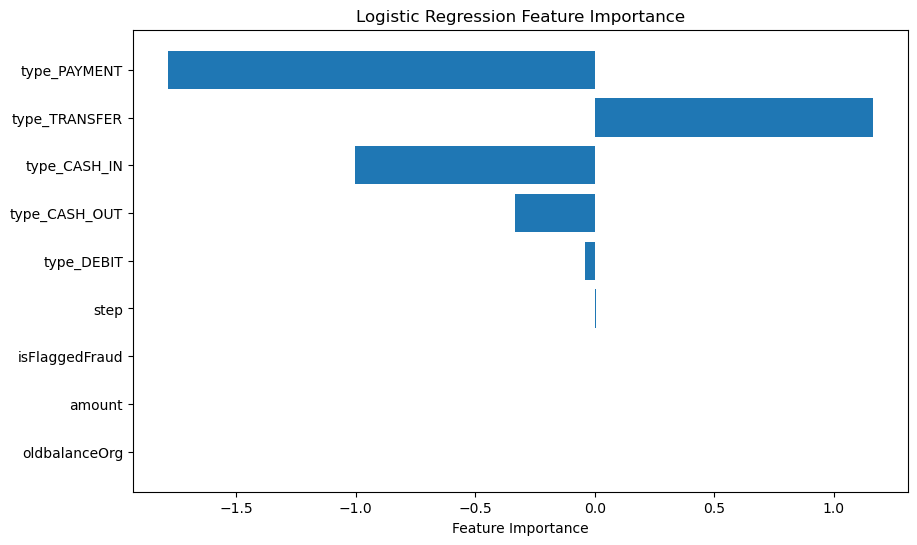

Feature Importance:
step: 0.004949136350407486
amount: 1.3340474793586194e-06
oldbalanceOrg: -5.8065715517606545e-08
isFlaggedFraud: 0.0014586323700647482
type_CASH_IN: -1.003447482266286
type_CASH_OUT: -0.3333246382231804
type_DEBIT: -0.03932757398240133
type_PAYMENT: -1.7849573182178287
type_TRANSFER: 1.1626520523633619


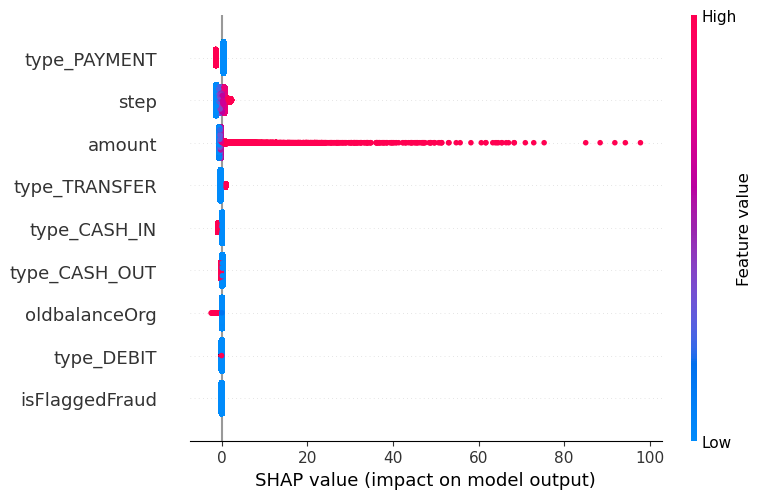

In [19]:
## Logistic regression on 50/50 undersampled data + hyperparameter tuning and nested cv
## Logistic Regression with hyperparameter tuning and nested cross validation 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define logistic regression on training set and print class. rep. 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_undsampl50, y_train_undsampl50)

# Define hyperparameters grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_val_undsampl50, y_val_undsampl50) 

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl50, y_train_undsampl50, cv=outer_cv)
print("Nested Cross-Validation Mean Score:", np.mean(nested_score))

# Get the best parameters
grid_search.fit(X_val_undsampl50, y_val_undsampl50) 
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_log_reg = LogisticRegression(**best_params)

# Fitting the best one on the training data and print classification report 
best_log_reg.fit(X_train_undsampl50, y_train_undsampl50)
y_train50_pred = best_log_reg.predict(X_train_undsampl50)
print("Classification Report training set:")
print(classification_report(y_train_undsampl50, y_train50_pred))

# Evaluate model with best hyperparameters on the Validation set
y_val50_pred = best_log_reg.predict(X_val_undsampl50)
print("Classification Report Validation Set after Hyperparameter Tuning and CV:")
print(classification_report(y_val_undsampl50, y_val50_pred))

# Evaluate model performance on test set
y_pred = best_log_reg.predict(X_test)
test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Classification Report Test Set:")
print(classification_report(y_test, y_pred))

# Get feature importance and plot 
feature_importance = best_log_reg.coef_[0]
sorted_indices = np.argsort(np.abs(feature_importance))

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

print("Feature Importance:")
for feature, coef in zip(X.columns, best_log_reg.coef_[0]):
    print(f"{feature}: {coef}")


# SHAP 
import shap
explainer = shap.Explainer(best_log_reg, X_train_undsampl50)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)


Nested Cross-Validation Accuracy scores: [0.97764853 0.97384651 0.97193149 0.97193133 0.97240661]
Mean Accuracy: 0.9735528929593136
Classification Report DT for training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5256
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     10512
   macro avg       1.00      1.00      1.00     10512
weighted avg       1.00      1.00      1.00     10512

Classification Report DT for Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1314
           1       0.98      0.98      0.98      1314

    accuracy                           0.98      2628
   macro avg       0.98      0.98      0.98      2628
weighted avg       0.98      0.98      0.98      2628

Classification Report DT for Test Set:
              precision    recall  f1-score   support

           0       1.00      0.9

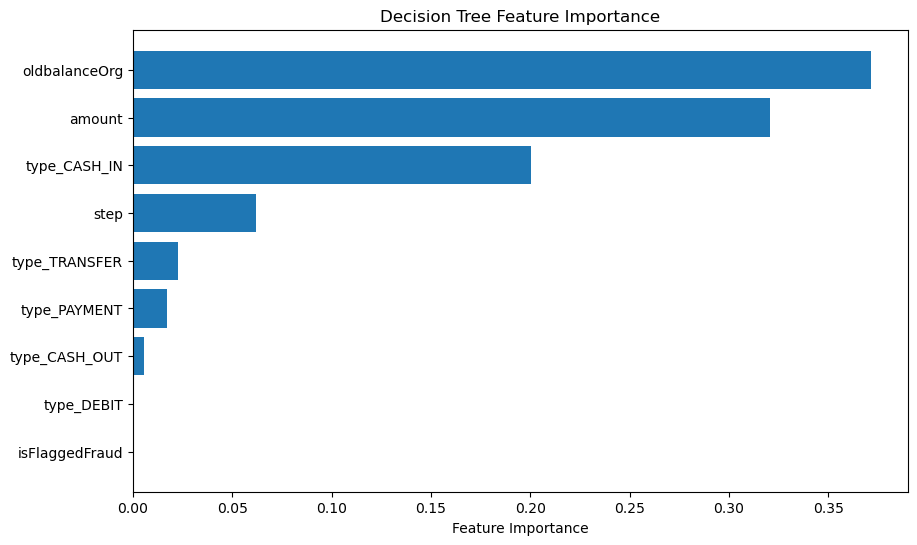

100%|===================| 2542681/2545048 [02:30<00:00]        

<Figure size 1000x600 with 0 Axes>

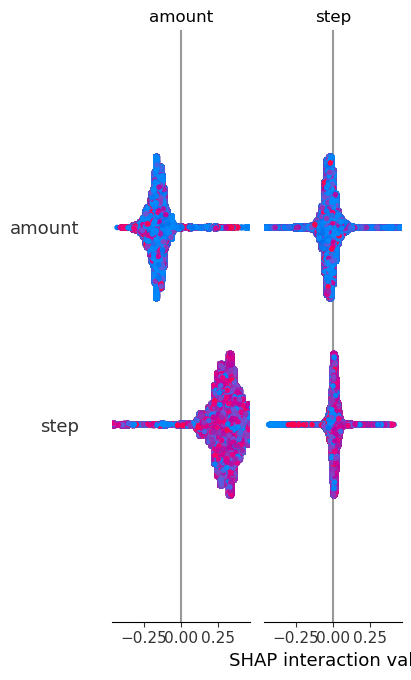

In [20]:
## DECISION TREE 50/50 with hyperparameter tuning and nested-cv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl50, y_train_undsampl50, cv=outer_cv)
print("Nested Cross-Validation Accuracy scores:", nested_score)
print("Mean Accuracy:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl50, y_val_undsampl50)
best_dt_params = grid_search.best_estimator_.get_params()
best_dt_classifier = grid_search.best_estimator_

# Now train on training data
best_dt_classifier.fit(X_train_undsampl50, y_train_undsampl50)
y_train50_pred = best_dt_classifier.predict(X_train_undsampl50)
print("Classification Report DT for training Set:")
print(classification_report(y_train_undsampl50, y_train50_pred))

# Evaluate on validation set
y_val50_pred = best_dt_classifier.predict(X_val_undsampl50)
print("Classification Report DT for Validation Set:")
print(classification_report(y_val_undsampl50, y_val50_pred))

# And on the test set
y_pred = best_dt_classifier.predict(X_test)
print("Classification Report DT for Test Set:")
print(classification_report(y_test, y_pred))


# Get feature importance
feature_importance = best_dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP 
import shap
explainer = shap.TreeExplainer(best_dt_classifier, X_train_undsampl50) #Should the X_train be in here?
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()



Nested Cross-Validation F1 scores: [0.98192841 0.98478212 0.98334834 0.98667892 0.98477552]
Mean F1: 0.9843026644420743
Performance on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5256
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     10512
   macro avg       1.00      1.00      1.00     10512
weighted avg       1.00      1.00      1.00     10512

Performance on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1314
           1       0.98      1.00      0.99      1314

    accuracy                           0.99      2628
   macro avg       0.99      0.99      0.99      2628
weighted avg       0.99      0.99      0.99      2628

Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.06      0.9

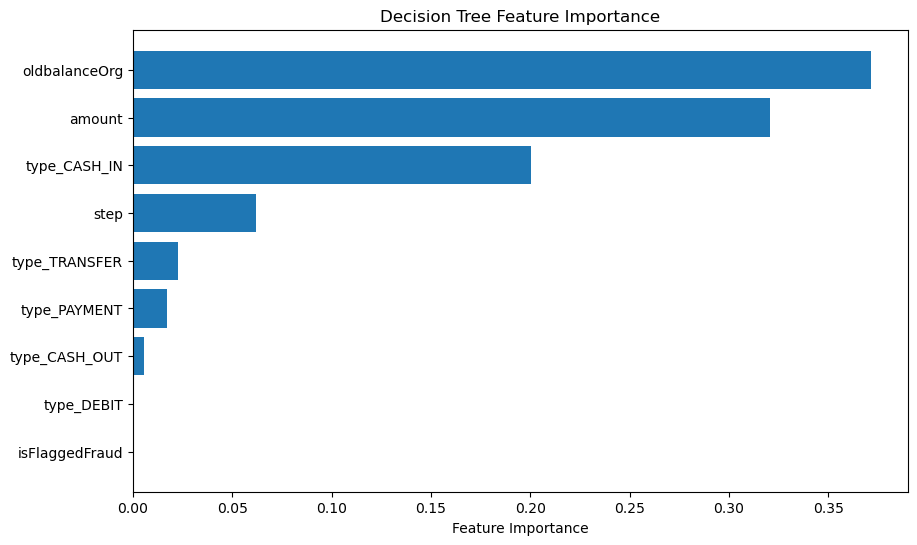

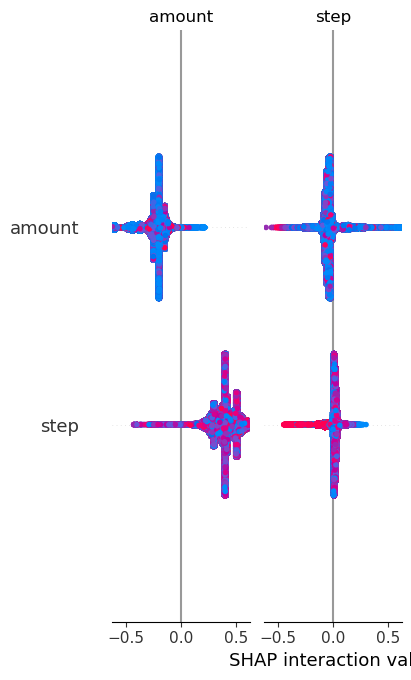

In [21]:
## RANDOM FOREST 50:50 with hyperparameter tuning and nested-cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import shap

# Define hyperparameters grid for tuning
param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

rf_classifier = RandomForestClassifier()

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl50, y_train_undsampl50, cv=outer_cv)
print("Nested Cross-Validation F1 scores:", nested_score)
print("Mean F1:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl50, y_val_undsampl50)
best_rf_params = grid_search.best_estimator_.get_params()
best_rf_classifier = grid_search.best_estimator_

# Train on training set
best_rf_classifier = grid_search.fit(X_train_undsampl50, y_train_undsampl50).best_estimator_
print("Performance on Training Set:")
y_train50_pred = best_rf_classifier.predict(X_train_undsampl50)
print(classification_report(y_train_undsampl50, y_train50_pred))

# Evaluate on validation set
print("Performance on Validation Set:")
y_val50_pred = best_rf_classifier.predict(X_val_undsampl50)
print(classification_report(y_val_undsampl50, y_val50_pred))

# Evaluate on test set
print("Performance on Test Set:")
y_pred = best_rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred)) 


# Extract feature importances
feature_importances = best_rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)
print("Feature Importances:", feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP

# Create a TreeExplainer object specifically for the Random Forest model
explainer = shap.TreeExplainer(best_rf_classifier)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot of SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)


### Models on 60/40 undersampled data

In [22]:
#### Undersampling TRAINING data 60/40 

# Separate data into two DFs based on 'isFraud'
df_train_majority = df_train[df_train['isFraud'] == 0]
df_train_minority = df_train[df_train['isFraud'] == 1]

# Calculate the 60% of total for majority class
nr_undersample_majority60 = int(len(df_train_minority) * (0.6 / 0.4))

# Undersample majority class to match the desired number of instances
df_train_majority_undsampl60 = df_train_majority.sample(n=nr_undersample_majority60, random_state=42)

# Combine to one df. 
df_train_undsampl60 = pd.concat([df_train_majority_undsampl60, df_train_minority])

# Shuffle the DataFrame to randomize the order of instances
df_train_undsampl60 = df_train_undsampl60.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_train_undsampl60['isFraud'].value_counts())

# Split the X and Y again
X_train_undsampl60 = df_train_undsampl60.drop(columns=['isFraud'])
y_train_undsampl60 = df_train_undsampl60['isFraud']

#### Undersampling VALIDATION Data 60/40
# Separate data into two DFs based on 'isFraud'
df_val_majority = df_val[df_val['isFraud'] == 0]
df_val_minority = df_val[df_val['isFraud'] == 1]

# Calculate the 60% of total for majority class
nr_undersample_val_majority60 = int(len(df_val_minority) * (0.6 / 0.4))

# Undersample majority class to match the desired number of instances
df_val_majority_undsampl60 = df_val_majority.sample(n=nr_undersample_val_majority60, random_state=42)

# Combine to one df. 
df_val_undsampl60 = pd.concat([df_val_majority_undsampl60, df_val_minority])

# Shuffle the DataFrame to randomize the order of instances
df_val_undsampl60 = df_val_undsampl60.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_val_undsampl60['isFraud'].value_counts())

# Split the X and Y again
X_val_undsampl60 = df_val_undsampl60.drop(columns=['isFraud'])
y_val_undsampl60 = df_val_undsampl60['isFraud']


#### Combine training and validation 
X_train_val60 = pd.concat([X_train_undsampl60, X_val_undsampl60], axis=0)
y_train_val60 = pd.concat([y_train_undsampl60, y_val_undsampl60], axis=0)

# And shuffle the rows
from sklearn.utils import shuffle

X_train_val60, y_train_val60 = shuffle(X_train_val60, y_train_val60, random_state=42)


0    7883
1    5256
Name: isFraud, dtype: int64
0    1970
1    1314
Name: isFraud, dtype: int64


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Nested Cross-Validation Mean Score: 0.8501138210977214


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Best Parameters: {'C': 100, 'penalty': 'l2'}
Classification Report training set:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      7883
           1       0.85      0.69      0.76      5256

    accuracy                           0.83     13139
   macro avg       0.83      0.80      0.81     13139
weighted avg       0.83      0.83      0.82     13139

Classification Report Validation Set after Hyperparameter Tuning and CV:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1970
           1       0.84      0.67      0.74      1314

    accuracy                           0.82      3284
   macro avg       0.82      0.79      0.80      3284
weighted avg       0.82      0.82      0.81      3284

Test Accuracy: 0.916677406477206
Classification Report Test Set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270881
           1      

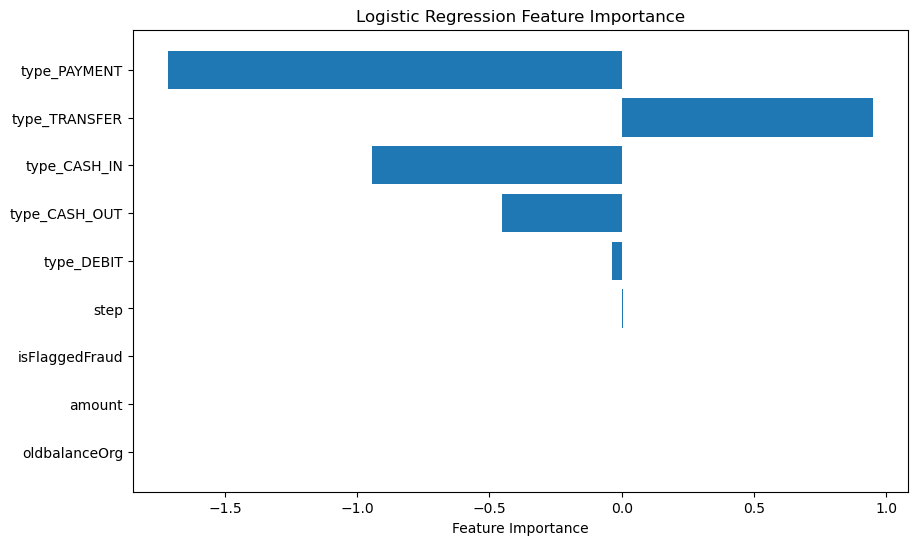

Feature Importance:
step: 0.004868466536620593
amount: 1.2821172987779215e-06
oldbalanceOrg: -6.384688026304157e-08
isFlaggedFraud: 0.0013815546434689594
type_CASH_IN: -0.9423700518505397
type_CASH_OUT: -0.45268074002554015
type_DEBIT: -0.03630475580666202
type_PAYMENT: -1.714527569562912
type_TRANSFER: 0.9487079020852681


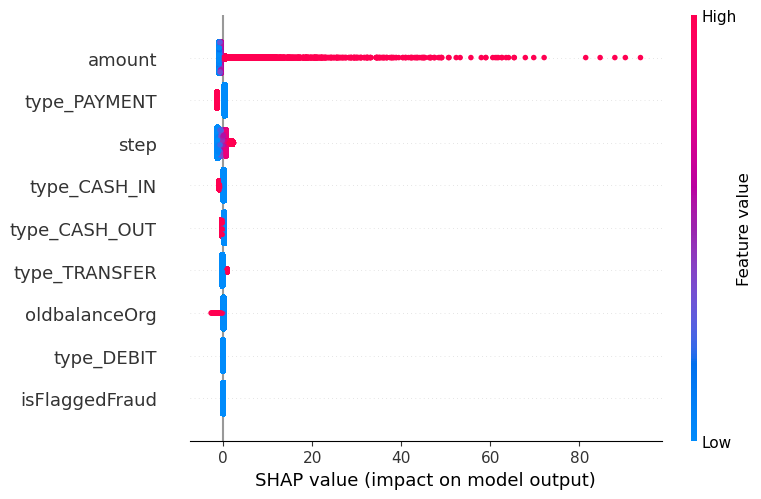

In [29]:
## Logistic regression on 60/40 undersampled data + hyperparameter tuning and nested cv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import shap
shap.initjs()

# Define logistic regression on training set and print class. rep. 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_undsampl60, y_train_undsampl60)

# Define hyperparameters grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_val_undsampl60, y_val_undsampl60) 

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl60, y_train_undsampl60, cv=outer_cv)
print("Nested Cross-Validation Mean Score:", np.mean(nested_score))

# Get the best parameters
grid_search.fit(X_val_undsampl60, y_val_undsampl60) 
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_log_reg = LogisticRegression(**best_params)

# Fitting the best one on the training data and print classification report 
best_log_reg.fit(X_train_undsampl60, y_train_undsampl60)
y_train60_pred = best_log_reg.predict(X_train_undsampl60)
print("Classification Report training set:")
print(classification_report(y_train_undsampl60, y_train60_pred))

# Evaluate model with best hyperparameters on the Validation set
y_val60_pred = best_log_reg.predict(X_val_undsampl60)
print("Classification Report Validation Set after Hyperparameter Tuning and CV:")
print(classification_report(y_val_undsampl60, y_val60_pred))

# Evaluate model performance on test set
y_pred = best_log_reg.predict(X_test)
test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Classification Report Test Set:")
print(classification_report(y_test, y_pred))

# Get feature importance and plot 
feature_importance = best_log_reg.coef_[0]
sorted_indices = np.argsort(np.abs(feature_importance))

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

print("Feature Importance:")
for feature, coef in zip(X.columns, best_log_reg.coef_[0]):
    print(f"{feature}: {coef}")


# SHAP 
import shap
explainer = shap.Explainer(best_log_reg, X_train_undsampl60)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)


Nested Cross-Validation Accuracy scores: [0.97339444 0.97627546 0.97861478 0.97310392 0.97544801]
Mean Accuracy: 0.9753673216192791
Classification Report DT for training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7883
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     13139
   macro avg       1.00      1.00      1.00     13139
weighted avg       1.00      1.00      1.00     13139

Classification Report DT for Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1970
           1       0.98      0.98      0.98      1314

    accuracy                           0.98      3284
   macro avg       0.98      0.98      0.98      3284
weighted avg       0.98      0.98      0.98      3284

Classification Report DT for Test Set:
              precision    recall  f1-score   support

           0       1.00      0.9

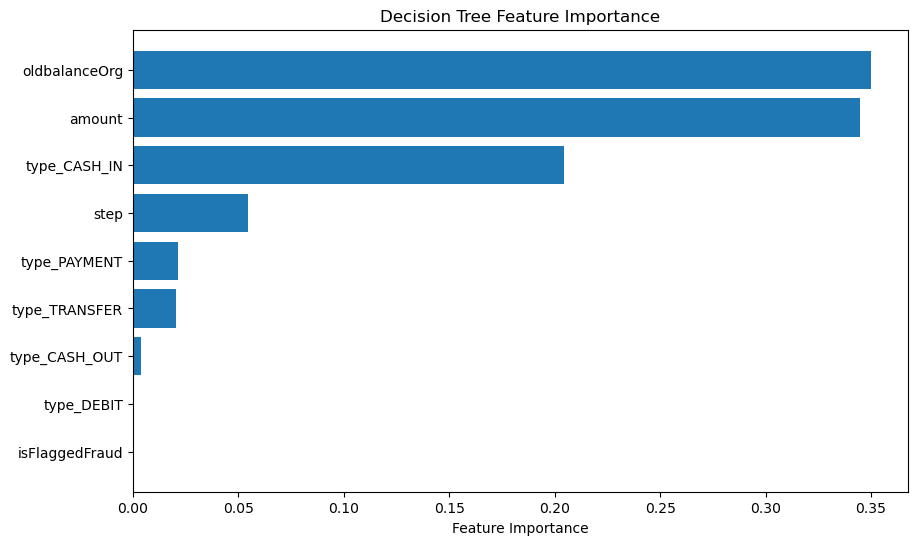

<Figure size 1000x600 with 0 Axes>

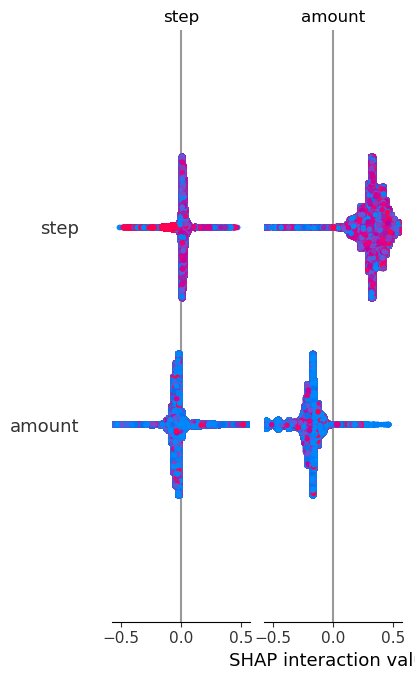

In [30]:
## DECISION TREE 60/40 with hyperparameter tuning and nested-cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl60, y_train_undsampl60, cv=outer_cv)
print("Nested Cross-Validation Accuracy scores:", nested_score)
print("Mean Accuracy:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl60, y_val_undsampl60)
best_dt_params = grid_search.best_estimator_.get_params()
best_dt_classifier = grid_search.best_estimator_

# Now train on training data
best_dt_classifier.fit(X_train_undsampl60, y_train_undsampl60)
y_train60_pred = best_dt_classifier.predict(X_train_undsampl60)
print("Classification Report DT for training Set:")
print(classification_report(y_train_undsampl60, y_train60_pred))

# Evaluate on validation set
y_val60_pred = best_dt_classifier.predict(X_val_undsampl60)
print("Classification Report DT for Validation Set:")
print(classification_report(y_val_undsampl60, y_val60_pred))

# And on the test set
y_pred = best_dt_classifier.predict(X_test)
print("Classification Report DT for Test Set:")
print(classification_report(y_test, y_pred))


# Get feature importance
feature_importance = best_dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP 
import shap
explainer = shap.TreeExplainer(best_dt_classifier)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()


Nested Cross-Validation F1 scores: [0.98420764 0.98419331 0.98341303 0.98380551 0.98537726]
Mean F1: 0.9841993506952995
Performance on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7883
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     13139
   macro avg       1.00      1.00      1.00     13139
weighted avg       1.00      1.00      1.00     13139

Performance on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1970
           1       0.98      1.00      0.99      1314

    accuracy                           0.99      3284
   macro avg       0.99      0.99      0.99      3284
weighted avg       0.99      0.99      0.99      3284

Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.07      0.9

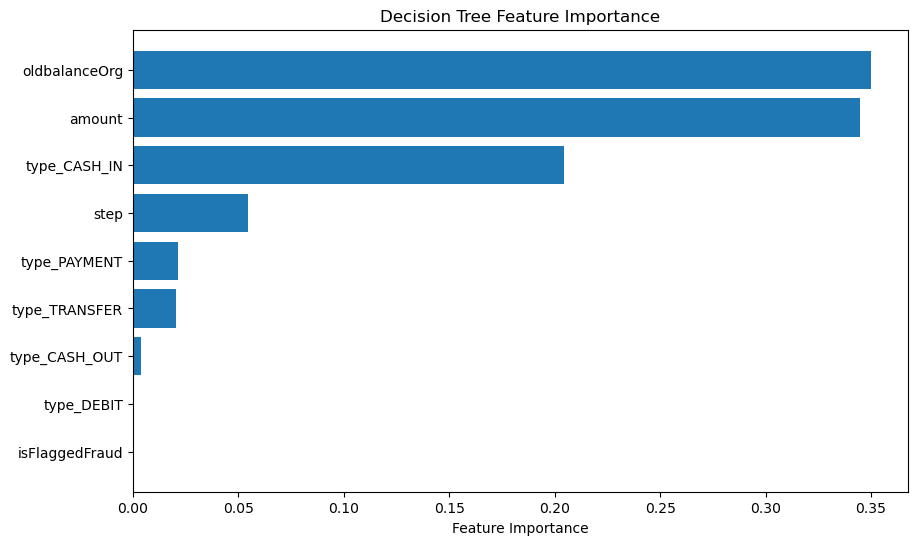

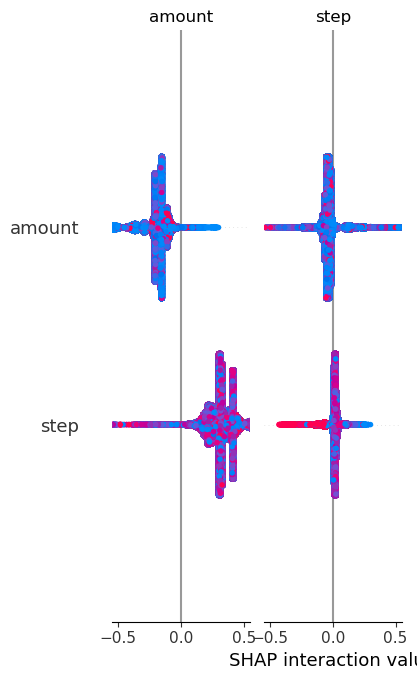

In [31]:
## RANDOM FOREST 60/40 with hyperparameter tuning and nested-cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import shap


# Define hyperparameters grid for tuning
param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

rf_classifier = RandomForestClassifier()

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl60, y_train_undsampl60, cv=outer_cv)
print("Nested Cross-Validation F1 scores:", nested_score)
print("Mean F1:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl60, y_val_undsampl60)
best_rf_params = grid_search.best_estimator_.get_params()
best_rf_classifier = grid_search.best_estimator_

# Train on training set
best_rf_classifier = grid_search.fit(X_train_undsampl60, y_train_undsampl60).best_estimator_
print("Performance on Training Set:")
y_train60_pred = best_rf_classifier.predict(X_train_undsampl60)
print(classification_report(y_train_undsampl60, y_train60_pred))

# Evaluate on validation set
print("Performance on Validation Set:")
y_val60_pred = best_rf_classifier.predict(X_val_undsampl60)
print(classification_report(y_val_undsampl60, y_val60_pred))

# Evaluate on test set
print("Performance on Test Set:")
y_pred = best_rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred)) 


# Extract feature importances
feature_importances = best_rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)
print("Feature Importances:", feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP

# Create a TreeExplainer object specifically for the Random Forest model
explainer = shap.TreeExplainer(best_rf_classifier)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot of SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)

### Undersampling 70:30

In [32]:
#### Undersampling training data 70/30

# Separate data into two DFs based on 'isFraud'
df_train_majority = df_train[df_train['isFraud'] == 0]
df_train_minority = df_train[df_train['isFraud'] == 1]

# Calculate the 60% of total for majority class
nr_undersample_majority70 = int(len(df_train_minority) * (0.7 / 0.3))

# Undersample majority class to match the desired number of instances
df_train_majority_undsampl70 = df_train_majority.sample(n=nr_undersample_majority70, random_state=42)

# Combine to one df. 
df_train_undsampl70 = pd.concat([df_train_majority_undsampl70, df_train_minority])

# Shuffle the DataFrame to randomize the order of instances
df_train_undsampl70 = df_train_undsampl70.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_train_undsampl70['isFraud'].value_counts())

# Split the X and Y again
X_train_undsampl70 = df_train_undsampl70.drop(columns=['isFraud'])
y_train_undsampl70 = df_train_undsampl70['isFraud']


#### Undersampling VALIDATION Data 70/30
# Separate data into two DFs based on 'isFraud'
df_val_majority = df_val[df_val['isFraud'] == 0]
df_val_minority = df_val[df_val['isFraud'] == 1]

# Calculate the 60% of total for majority class
nr_undersample_val_majority70 = int(len(df_val_minority) * (0.7 / 0.3))

# Undersample majority class to match the desired number of instances
df_val_majority_undsampl70 = df_val_majority.sample(n=nr_undersample_val_majority70, random_state=42)

# Combine to one df. 
df_val_undsampl70 = pd.concat([df_val_majority_undsampl70, df_val_minority])

# Shuffle the DataFrame to randomize the order of instances
df_val_undsampl70 = df_val_undsampl70.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_val_undsampl70['isFraud'].value_counts())

# Split the X and Y again
X_val_undsampl70 = df_val_undsampl70.drop(columns=['isFraud'])
y_val_undsampl70 = df_val_undsampl70['isFraud']


#### Combine training and validation 
X_train_val70 = pd.concat([X_train_undsampl70, X_val_undsampl70], axis=0)
y_train_val70 = pd.concat([y_train_undsampl70, y_val_undsampl70], axis=0)

# And shuffle the rows
from sklearn.utils import shuffle

X_train_val70, y_train_val70 = shuffle(X_train_val70, y_train_val70, random_state=42)


0    12264
1     5256
Name: isFraud, dtype: int64
0    3066
1    1314
Name: isFraud, dtype: int64


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Nested Cross-Validation Mean Score: 0.8842357901434734


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Best Parameters: {'C': 100, 'penalty': 'l2'}
Classification Report training set:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     12264
           1       0.82      0.60      0.69      5256

    accuracy                           0.84     17520
   macro avg       0.83      0.77      0.79     17520
weighted avg       0.84      0.84      0.83     17520

Classification Report Validation Set after Hyperparameter Tuning and CV:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3066
           1       0.80      0.57      0.67      1314

    accuracy                           0.83      4380
   macro avg       0.82      0.76      0.78      4380
weighted avg       0.83      0.83      0.82      4380



c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.9421040389022133
Classification Report Test Set:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1270881
           1       0.01      0.59      0.03      1643

    accuracy                           0.94   1272524
   macro avg       0.51      0.77      0.50   1272524
weighted avg       1.00      0.94      0.97   1272524



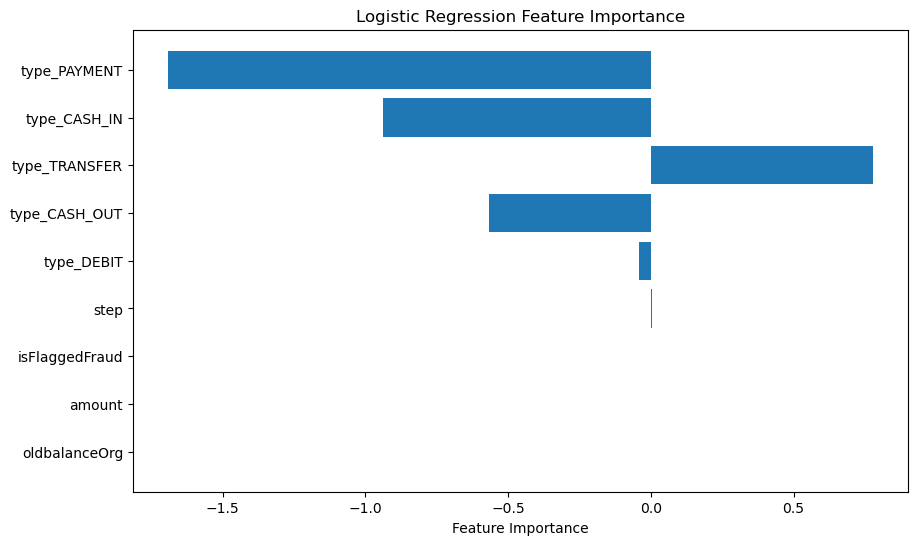

Feature Importance:
step: 0.004874924257911159
amount: 1.1632230264667162e-06
oldbalanceOrg: -4.831270864239434e-08
isFlaggedFraud: 0.0014937955930954762
type_CASH_IN: -0.9389631362284308
type_CASH_OUT: -0.5657970887740411
type_DEBIT: -0.04138129222589565
type_PAYMENT: -1.6910074813131846
type_TRANSFER: 0.7775270301400383


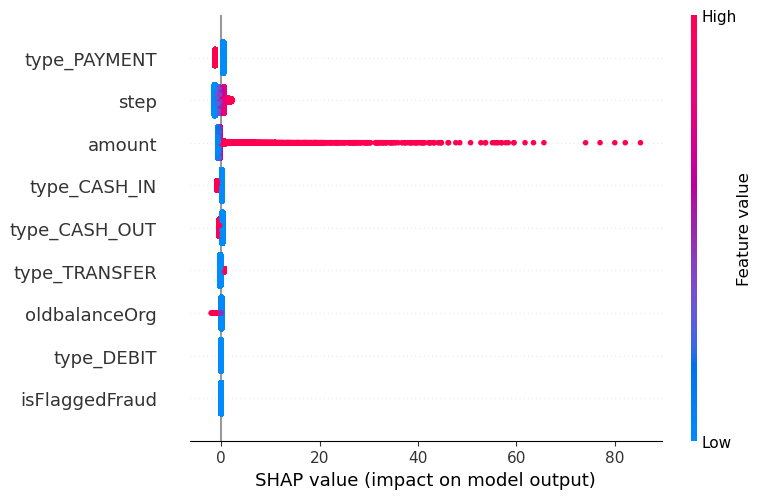

In [33]:
## Logistic regression on 70:30 undersampled data + hyperparameter tuning and nested cv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define logistic regression on training set and print class. rep. 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_undsampl70, y_train_undsampl70)

# Define hyperparameters grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_val_undsampl70, y_val_undsampl70) 

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl70, y_train_undsampl70, cv=outer_cv)
print("Nested Cross-Validation Mean Score:", np.mean(nested_score))

# Get the best parameters
grid_search.fit(X_val_undsampl70, y_val_undsampl70) 
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_log_reg = LogisticRegression(**best_params)

# Fitting the best one on the training data and print classification report 
best_log_reg.fit(X_train_undsampl70, y_train_undsampl70)
y_train70_pred = best_log_reg.predict(X_train_undsampl70)
print("Classification Report training set:")
print(classification_report(y_train_undsampl70, y_train70_pred))

# Evaluate model with best hyperparameters on the Validation set
y_val70_pred = best_log_reg.predict(X_val_undsampl70)
print("Classification Report Validation Set after Hyperparameter Tuning and CV:")
print(classification_report(y_val_undsampl70, y_val70_pred))

# Evaluate model performance on test set
y_pred = best_log_reg.predict(X_test)
test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Classification Report Test Set:")
print(classification_report(y_test, y_pred))

# Get feature importance and plot 
feature_importance = best_log_reg.coef_[0]
sorted_indices = np.argsort(np.abs(feature_importance))

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

print("Feature Importance:")
for feature, coef in zip(X.columns, best_log_reg.coef_[0]):
    print(f"{feature}: {coef}")


# SHAP 
import shap
explainer = shap.Explainer(best_log_reg, X_train_undsampl70)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)

Nested Cross-Validation Accuracy scores: [0.96471982 0.97266162 0.96996153 0.97057392 0.97858774]
Mean Accuracy: 0.9713009266331112
Classification Report DT for training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12264
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     17520
   macro avg       1.00      1.00      1.00     17520
weighted avg       1.00      1.00      1.00     17520

Classification Report DT for Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3066
           1       0.96      0.97      0.97      1314

    accuracy                           0.98      4380
   macro avg       0.98      0.98      0.98      4380
weighted avg       0.98      0.98      0.98      4380

Classification Report DT for Test Set:
              precision    recall  f1-score   support

           0       1.00      0.9

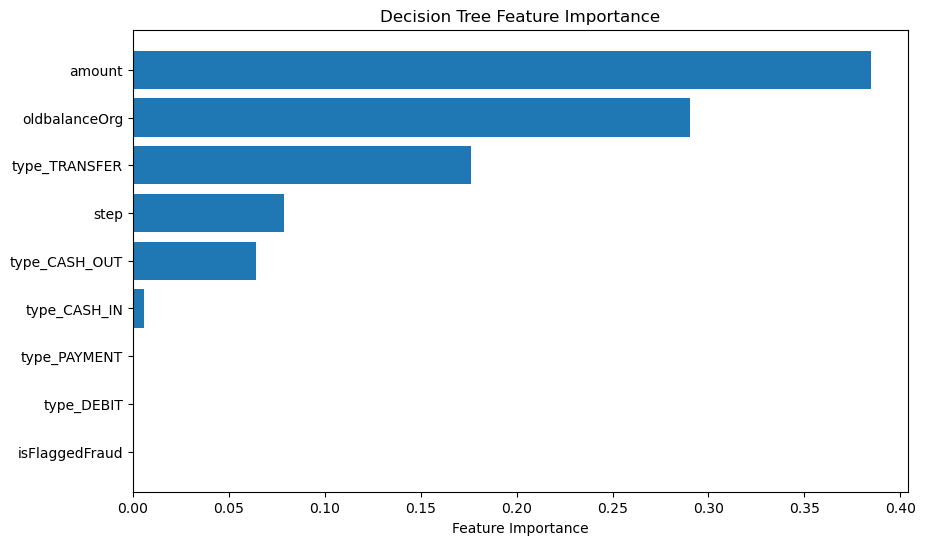

<Figure size 1000x600 with 0 Axes>

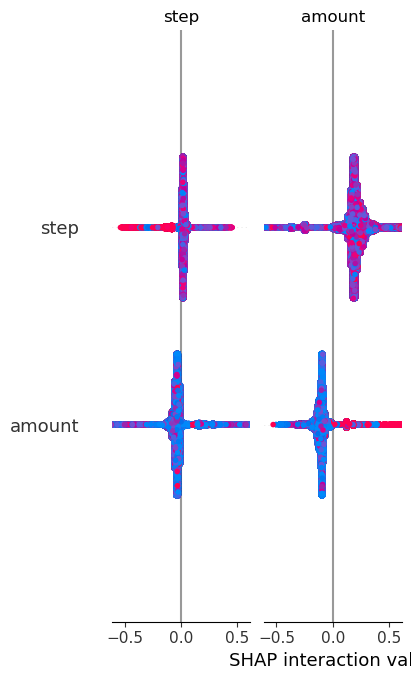

In [34]:
## DECISION TREE 70/30 with hyperparameter tuning and nested-cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl70, y_train_undsampl70, cv=outer_cv)
print("Nested Cross-Validation Accuracy scores:", nested_score)
print("Mean Accuracy:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl70, y_val_undsampl70)
best_dt_params = grid_search.best_estimator_.get_params()
best_dt_classifier = grid_search.best_estimator_

# Now train on training data
best_dt_classifier.fit(X_train_undsampl70, y_train_undsampl70)
y_train70_pred = best_dt_classifier.predict(X_train_undsampl70)
print("Classification Report DT for training Set:")
print(classification_report(y_train_undsampl70, y_train70_pred))

# Evaluate on validation set
y_val70_pred = best_dt_classifier.predict(X_val_undsampl70)
print("Classification Report DT for Validation Set:")
print(classification_report(y_val_undsampl70, y_val70_pred))

# And on the test set
y_pred = best_dt_classifier.predict(X_test)
print("Classification Report DT for Test Set:")
print(classification_report(y_test, y_pred))


# Get feature importance
feature_importance = best_dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP 
import shap
explainer = shap.TreeExplainer(best_dt_classifier)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()


Nested Cross-Validation F1 scores: [0.98073114 0.98348819 0.98114426 0.98514558 0.98748546]
Mean F1: 0.983598926483717
Performance on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12264
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     17520
   macro avg       1.00      1.00      1.00     17520
weighted avg       1.00      1.00      1.00     17520

Performance on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3066
           1       0.97      0.99      0.98      1314

    accuracy                           0.99      4380
   macro avg       0.98      0.99      0.99      4380
weighted avg       0.99      0.99      0.99      4380

Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.09      0.99

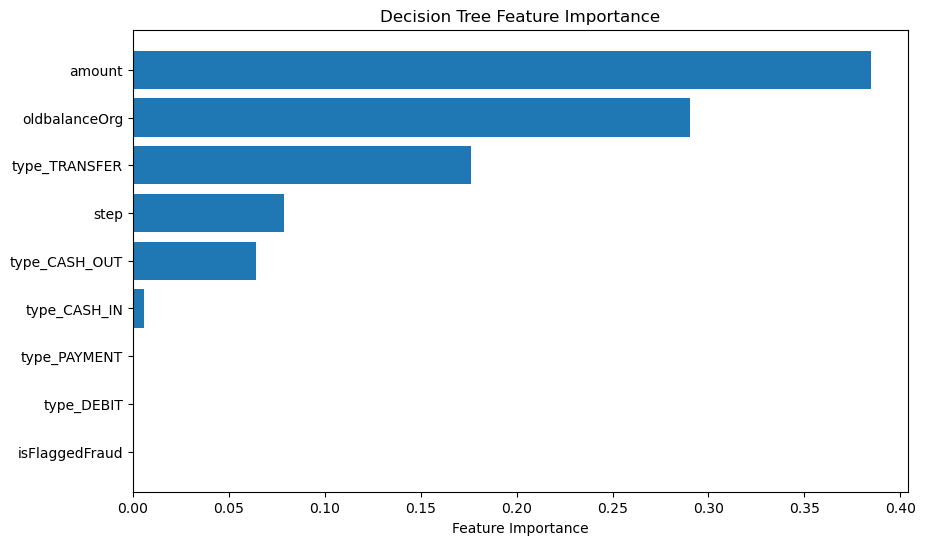

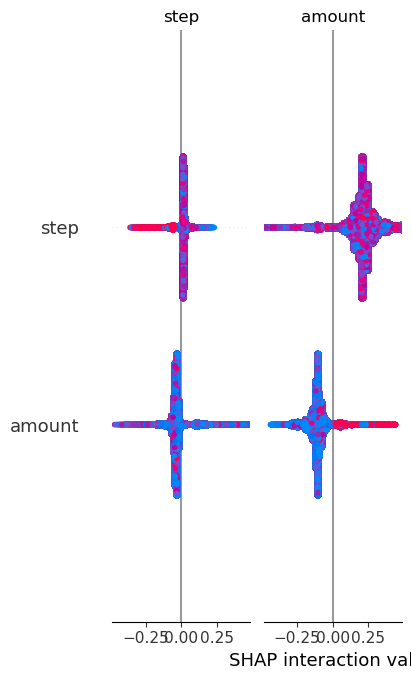

In [35]:
## RANDOM FOREST 70/30 with hyperparameter tuning and nested-cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import shap

# Define hyperparameters grid for tuning
param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

rf_classifier = RandomForestClassifier()

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl70, y_train_undsampl70, cv=outer_cv)
print("Nested Cross-Validation F1 scores:", nested_score)
print("Mean F1:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl70, y_val_undsampl70)
best_rf_params = grid_search.best_estimator_.get_params()
best_rf_classifier = grid_search.best_estimator_

# Train on training set
best_rf_classifier = grid_search.fit(X_train_undsampl70, y_train_undsampl70).best_estimator_
print("Performance on Training Set:")
y_train70_pred = best_rf_classifier.predict(X_train_undsampl70)
print(classification_report(y_train_undsampl70, y_train70_pred))

# Evaluate on validation set
print("Performance on Validation Set:")
y_val70_pred = best_rf_classifier.predict(X_val_undsampl70)
print(classification_report(y_val_undsampl70, y_val70_pred))

# Evaluate on test set
print("Performance on Test Set:")
y_pred = best_rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred)) 


# Extract feature importances
feature_importances = best_rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)
print("Feature Importances:", feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP

# Create a TreeExplainer object specifically for the Random Forest model
explainer = shap.TreeExplainer(best_rf_classifier)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot of SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)

### Undersampling 80:20

In [36]:
#### Undersampling training data 80/20

# Separate data into two DFs based on 'isFraud'
df_train_majority = df_train[df_train['isFraud'] == 0]
df_train_minority = df_train[df_train['isFraud'] == 1]

# Calculate the 80% of total for majority class
nr_undersample_majority80 = int(len(df_train_minority) * (0.8 / 0.2))

# Undersample majority class to match the desired number of instances
df_train_majority_undsampl80 = df_train_majority.sample(n=nr_undersample_majority80, random_state=42)

# Combine to one df. 
df_train_undsampl80 = pd.concat([df_train_majority_undsampl80, df_train_minority])

# Shuffle the DataFrame to randomize the order of instances
df_train_undsampl80 = df_train_undsampl80.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_train_undsampl80['isFraud'].value_counts())

# Split the X and Y again
X_train_undsampl80 = df_train_undsampl80.drop(columns=['isFraud'])
y_train_undsampl80 = df_train_undsampl80['isFraud']


#### Undersampling VALIDATION Data 80/20
# Separate data into two DFs based on 'isFraud'
df_val_majority = df_val[df_val['isFraud'] == 0]
df_val_minority = df_val[df_val['isFraud'] == 1]

# Calculate the 80% of total for majority class
nr_undersample_val_majority80 = int(len(df_val_minority) * (0.8 / 0.2))

# Undersample majority class to match the desired number of instances
df_val_majority_undsampl80 = df_val_majority.sample(n=nr_undersample_val_majority80, random_state=42)

# Combine to one df. 
df_val_undsampl80 = pd.concat([df_val_majority_undsampl80, df_val_minority])

# Shuffle the DataFrame to randomize the order of instances
df_val_undsampl80 = df_val_undsampl80.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_val_undsampl80['isFraud'].value_counts())

# Split the X and Y again
X_val_undsampl80 = df_val_undsampl80.drop(columns=['isFraud'])
y_val_undsampl80 = df_val_undsampl80['isFraud']



0    21024
1     5256
Name: isFraud, dtype: int64
0    5256
1    1314
Name: isFraud, dtype: int64


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Nested Cross-Validation Mean Score: 0.8149269540776295


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Best Parameters: {'C': 100, 'penalty': 'l2'}
Classification Report training set:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     21024
           1       0.83      0.61      0.70      5256

    accuracy                           0.90     26280
   macro avg       0.87      0.79      0.82     26280
weighted avg       0.89      0.90      0.89     26280

Classification Report Validation Set after Hyperparameter Tuning and CV:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5256
           1       0.79      0.45      0.57      1314

    accuracy                           0.86      6570
   macro avg       0.83      0.71      0.74      6570
weighted avg       0.86      0.86      0.85      6570

Test Accuracy: 0.9698229660108572
Classification Report Test Set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270881
           1       0.02      0.46      0.04      1643

    accuracy                           0.97   1272524
   macro avg       0.51      0.72      0.51   1272524
weighted avg       1.00      0.97      0.98   1272524



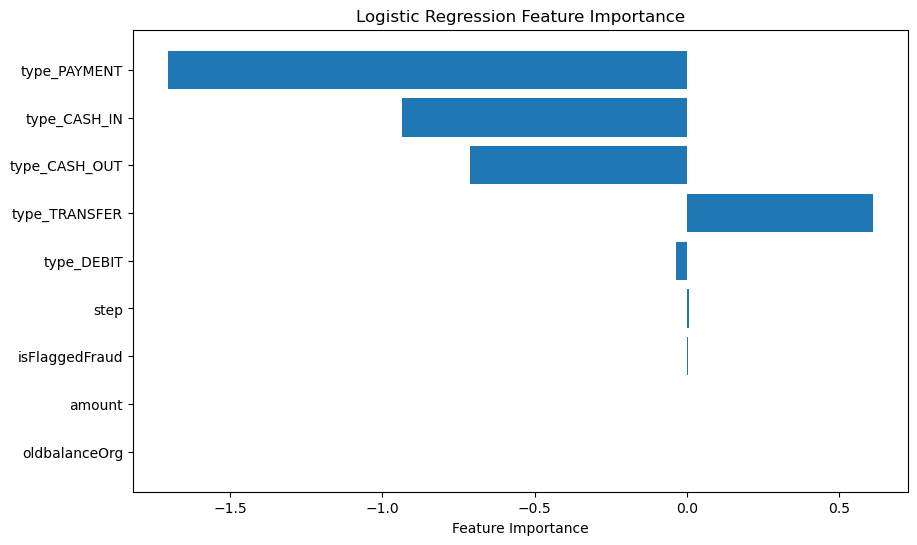

Feature Importance:
step: 0.004854285665196611
amount: 9.713757828594163e-07
oldbalanceOrg: -2.9722839684465033e-08
isFlaggedFraud: 0.0019864520773811207
type_CASH_IN: -0.9350729108423522
type_CASH_OUT: -0.7138210779953542
type_DEBIT: -0.035895597993273826
type_PAYMENT: -1.7027412716519936
type_TRANSFER: 0.6094559055160463


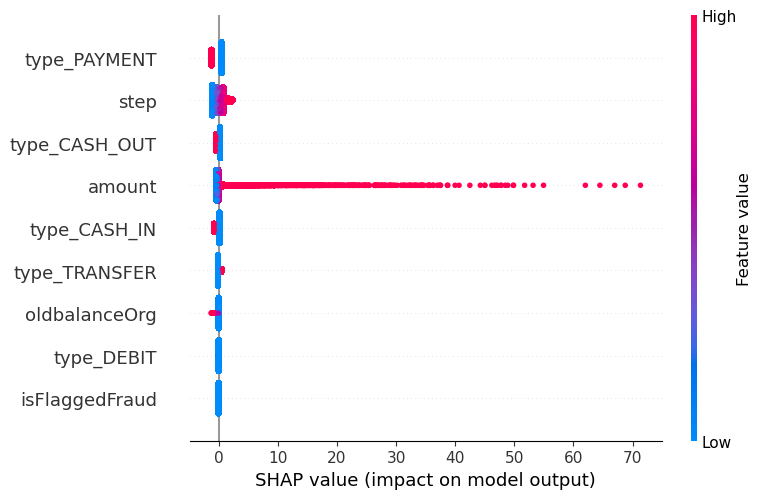

In [38]:
## Logistic regression on 80/20 undersampled data + hyperparameter tuning and nested cv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define logistic regression on training set and print class. rep. 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_undsampl80, y_train_undsampl80)

# Define hyperparameters grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_val_undsampl80, y_val_undsampl80) 

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl80, y_train_undsampl80, cv=outer_cv)
print("Nested Cross-Validation Mean Score:", np.mean(nested_score))

# Get the best parameters
grid_search.fit(X_val_undsampl80, y_val_undsampl80) 
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_log_reg = LogisticRegression(**best_params)

# Fitting the best one on the training data and print classification report 
best_log_reg.fit(X_train_undsampl80, y_train_undsampl80)
y_train80_pred = log_reg.predict(X_train_undsampl80)
print("Classification Report training set:")
print(classification_report(y_train_undsampl80, y_train80_pred))

# Evaluate model with best hyperparameters on the Validation set
y_val80_pred = best_log_reg.predict(X_val_undsampl80)
print("Classification Report Validation Set after Hyperparameter Tuning and CV:")
print(classification_report(y_val_undsampl80, y_val80_pred))

# Evaluate model performance on test set
y_pred = best_log_reg.predict(X_test)
test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Classification Report Test Set:")
print(classification_report(y_test, y_pred))

# Get feature importance and plot 
feature_importance = best_log_reg.coef_[0]
sorted_indices = np.argsort(np.abs(feature_importance))

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

print("Feature Importance:")
for feature, coef in zip(X.columns, best_log_reg.coef_[0]):
    print(f"{feature}: {coef}")


# SHAP 
import shap
explainer = shap.Explainer(best_log_reg, X_train_undsampl80)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)


Nested Cross-Validation Accuracy scores: [0.9658202  0.96501578 0.96603253 0.96907854 0.97301106]
Mean Accuracy: 0.9677916208484421
Classification Report DT for training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21024
           1       0.98      1.00      0.99      5256

    accuracy                           1.00     26280
   macro avg       0.99      1.00      0.99     26280
weighted avg       1.00      1.00      1.00     26280

Classification Report DT for Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5256
           1       0.94      0.97      0.96      1314

    accuracy                           0.98      6570
   macro avg       0.97      0.98      0.97      6570
weighted avg       0.98      0.98      0.98      6570

Classification Report DT for Test Set:
              precision    recall  f1-score   support

           0       1.00      0.9

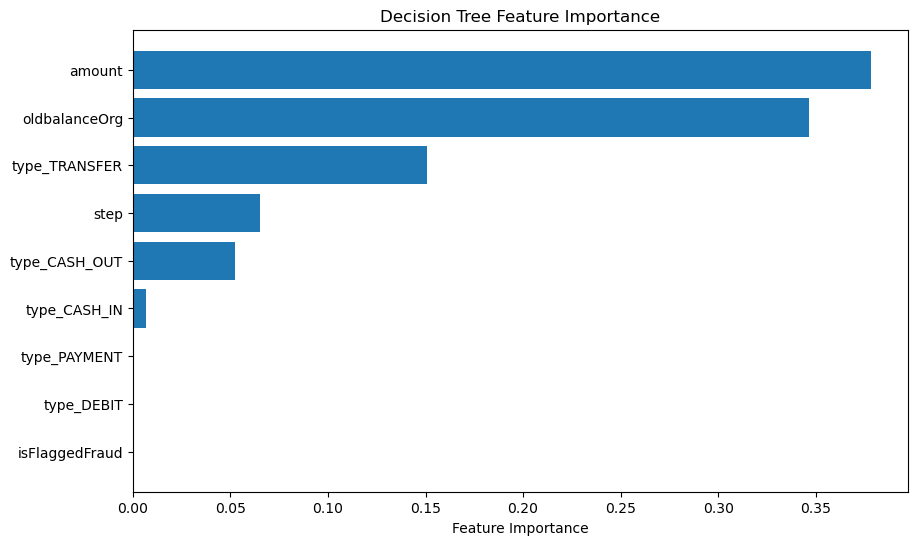

<Figure size 1000x600 with 0 Axes>

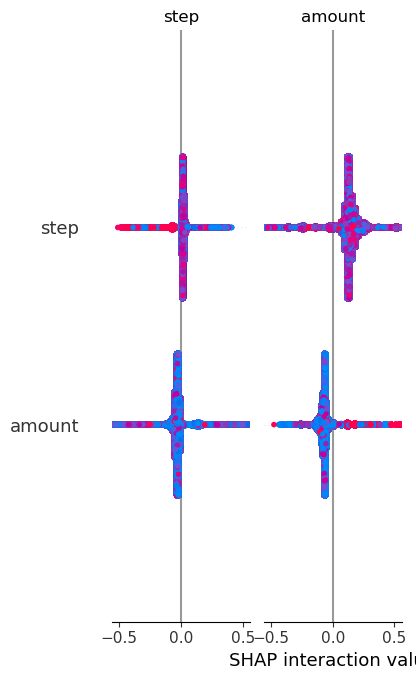

In [39]:
## DECISION TREE 80/20 with hyperparameter tuning and nested-cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl80, y_train_undsampl80, cv=outer_cv)
print("Nested Cross-Validation Accuracy scores:", nested_score)
print("Mean Accuracy:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl80, y_val_undsampl80)
best_dt_params = grid_search.best_estimator_.get_params()
best_dt_classifier = grid_search.best_estimator_

# Now train on training data
best_dt_classifier.fit(X_train_undsampl80, y_train_undsampl80)
y_train80_pred = best_dt_classifier.predict(X_train_undsampl80)
print("Classification Report DT for training Set:")
print(classification_report(y_train_undsampl80, y_train80_pred))

# Evaluate on validation set
y_val80_pred = best_dt_classifier.predict(X_val_undsampl80)
print("Classification Report DT for Validation Set:")
print(classification_report(y_val_undsampl80, y_val80_pred))

# And on the test set
y_pred = best_dt_classifier.predict(X_test)
print("Classification Report DT for Test Set:")
print(classification_report(y_test, y_pred))


# Get feature importance
feature_importance = best_dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP 
import shap
explainer = shap.TreeExplainer(best_dt_classifier)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()


Nested Cross-Validation F1 scores: [0.97872907 0.97880367 0.97936354 0.98018525 0.98350241]
Mean F1: 0.9801167877421479
Performance on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21024
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     26280
   macro avg       1.00      1.00      1.00     26280
weighted avg       1.00      1.00      1.00     26280

Performance on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5256
           1       0.96      0.99      0.98      1314

    accuracy                           0.99      6570
   macro avg       0.98      0.99      0.98      6570
weighted avg       0.99      0.99      0.99      6570

Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.11      0.9

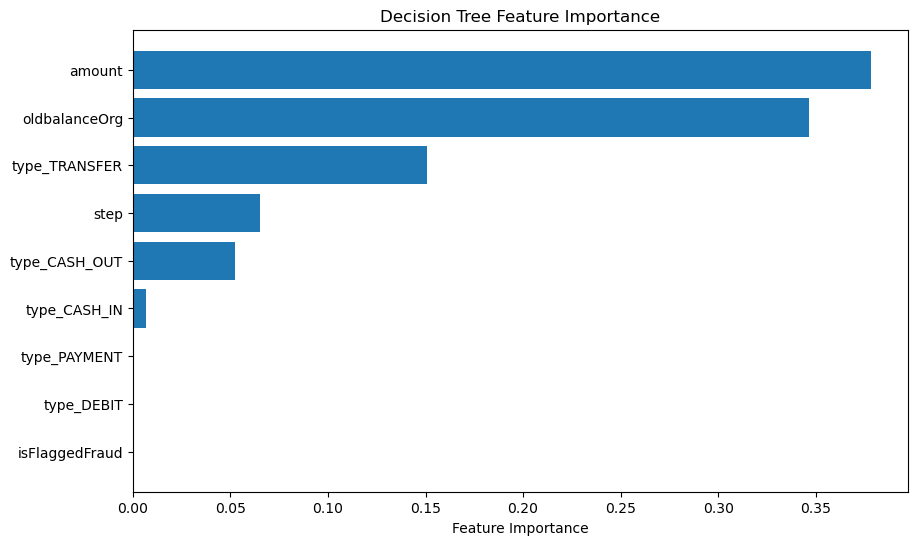

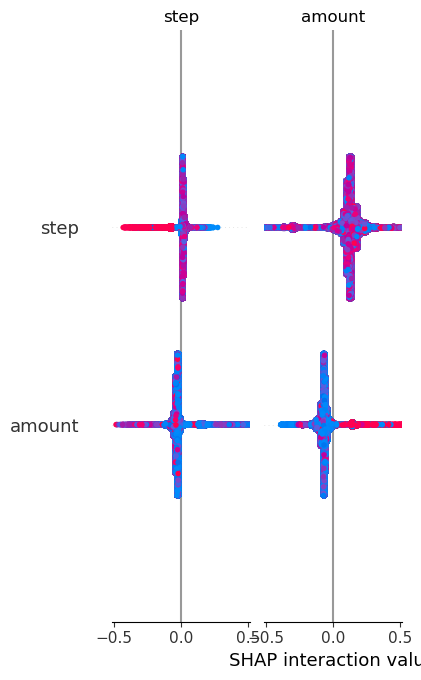

In [40]:
## RANDOM FOREST 80/20 with hyperparameter tuning and nested-cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import shap

# Define hyperparameters grid for tuning
param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

rf_classifier = RandomForestClassifier()

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl80, y_train_undsampl80, cv=outer_cv)
print("Nested Cross-Validation F1 scores:", nested_score)
print("Mean F1:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl80, y_val_undsampl80)
best_rf_params = grid_search.best_estimator_.get_params()
best_rf_classifier = grid_search.best_estimator_

# Train on training set
best_rf_classifier = grid_search.fit(X_train_undsampl80, y_train_undsampl80).best_estimator_
print("Performance on Training Set:")
y_train80_pred = best_rf_classifier.predict(X_train_undsampl80)
print(classification_report(y_train_undsampl80, y_train80_pred))

# Evaluate on validation set
print("Performance on Validation Set:")
y_val80_pred = best_rf_classifier.predict(X_val_undsampl80)
print(classification_report(y_val_undsampl80, y_val80_pred))

# Evaluate on test set
print("Performance on Test Set:")
y_pred = best_rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred)) 


# Extract feature importances
feature_importances = best_rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)
print("Feature Importances:", feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP

# Create a TreeExplainer object specifically for the Random Forest model
explainer = shap.TreeExplainer(best_rf_classifier)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot of SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)

print(shap_values)

### Undersampling 90:10

In [7]:
#### Undersampling training data 90/10

# Separate data into two DFs based on 'isFraud'
df_train_majority = df_train[df_train['isFraud'] == 0]
df_train_minority = df_train[df_train['isFraud'] == 1]

# Calculate the 90% of total for majority class
nr_undersample_majority90 = int(len(df_train_minority) * (0.9 / 0.1))

# Undersample majority class to match the desired number of instances
df_train_majority_undsampl90 = df_train_majority.sample(n=nr_undersample_majority90, random_state=42)

# Combine to one df. 
df_train_undsampl90 = pd.concat([df_train_majority_undsampl90, df_train_minority])

# Shuffle the DataFrame to randomize the order of instances
df_train_undsampl90 = df_train_undsampl90.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_train_undsampl90['isFraud'].value_counts())

# Split the X and Y again
X_train_undsampl90 = df_train_undsampl90.drop(columns=['isFraud'])
y_train_undsampl90 = df_train_undsampl90['isFraud']


#### Undersampling VALIDATION Data 90/10
# Separate data into two DFs based on 'isFraud'
df_val_majority = df_val[df_val['isFraud'] == 0]
df_val_minority = df_val[df_val['isFraud'] == 1]

# Calculate the 80% of total for majority class
nr_undersample_val_majority90 = int(len(df_val_minority) * (0.9 / 0.1))

# Undersample majority class to match the desired number of instances
df_val_majority_undsampl90 = df_val_majority.sample(n=nr_undersample_val_majority90, random_state=42)

# Combine to one df. 
df_val_undsampl90 = pd.concat([df_val_majority_undsampl90, df_val_minority])

# Shuffle the DataFrame to randomize the order of instances
df_val_undsampl90 = df_val_undsampl90.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution to confirm balanced classes
print(df_val_undsampl90['isFraud'].value_counts())

# Split the X and Y again
X_val_undsampl90 = df_val_undsampl90.drop(columns=['isFraud'])
y_val_undsampl90 = df_val_undsampl90['isFraud']


0    47304
1     5256
Name: isFraud, dtype: int64
0    11826
1     1314
Name: isFraud, dtype: int64


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Nested Cross-Validation Mean Score: 0.7269198639664183


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Best Parameters: {'C': 1, 'penalty': 'l2'}


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report training set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     47304
           1       0.92      0.44      0.59      5256

    accuracy                           0.94     52560
   macro avg       0.93      0.72      0.78     52560
weighted avg       0.94      0.94      0.93     52560

Classification Report Validation Set after Hyperparameter Tuning and CV:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11826
           1       0.71      0.28      0.40      1314

    accuracy                           0.92     13140
   macro avg       0.82      0.63      0.68     13140
weighted avg       0.90      0.92      0.90     13140

Test Accuracy: 0.9894131662742707
Classification Report Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.03      0.27      0.06      1643

    acc

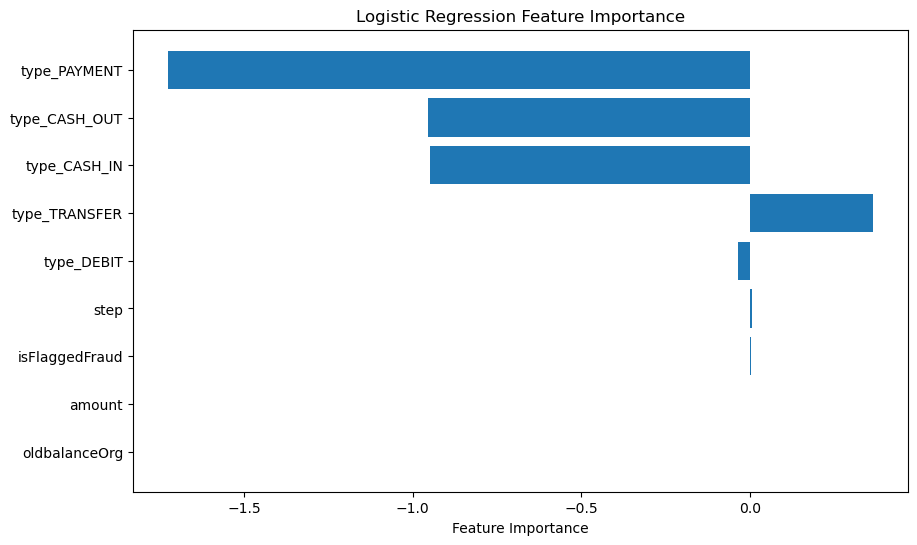

Feature Importance:
step: 0.004960319762375375
amount: 6.908574982037742e-07
oldbalanceOrg: -3.081769516904022e-09
isFlaggedFraud: 0.0029638976952027513
type_CASH_IN: -0.9492577230249942
type_CASH_OUT: -0.9542944084731773
type_DEBIT: -0.034961998841911465
type_PAYMENT: -1.7243988176356884
type_TRANSFER: 0.36320015726481913


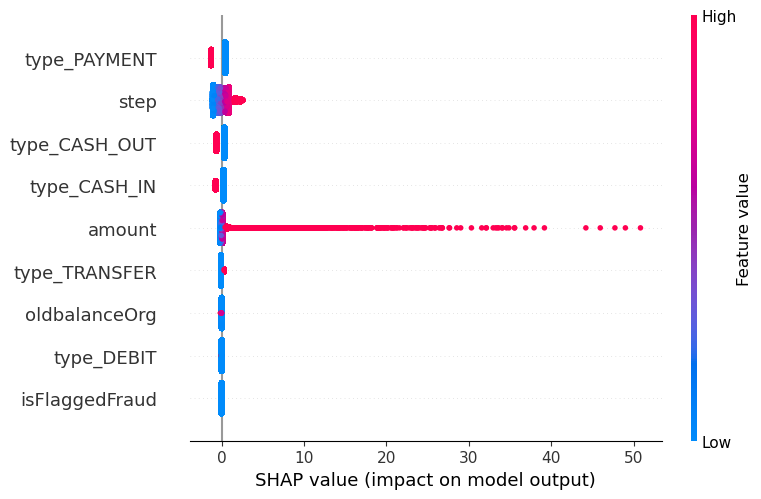

[[ 3.78323588e-01  4.48089680e-01  3.88612981e-03 ... -0.00000000e+00
   4.48343693e-01  3.05088132e-01]
 [ 8.69395245e-01 -9.96518309e-02 -2.57338496e-03 ... -0.00000000e+00
   4.48343693e-01 -5.81120252e-02]
 [ 2.45173725e+00 -1.63091085e-01  3.88583088e-03 ... -0.00000000e+00
  -1.27605513e+00 -5.81120252e-02]
 ...
 [ 7.35466611e-01 -7.34448150e-02  3.82121233e-03 ... -0.00000000e+00
   4.48343693e-01 -5.81120252e-02]
 [-1.01552626e+00 -6.74204132e-02  3.88680163e-03 ... -0.00000000e+00
   4.48343693e-01 -5.81120252e-02]
 [-9.78671089e-02  2.30695005e-04  3.86914618e-03 ... -0.00000000e+00
   4.48343693e-01  3.05088132e-01]]


In [43]:
## Logistic regression on 90/10 undersampled data + hyperparameter tuning and nested cv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define logistic regression on training set and print class. rep. 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_undsampl90, y_train_undsampl90)

# Define hyperparameters grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_val_undsampl90, y_val_undsampl90) 

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl90, y_train_undsampl90, cv=outer_cv)
print("Nested Cross-Validation Mean Score:", np.mean(nested_score))

# Get the best parameters
grid_search.fit(X_val_undsampl90, y_val_undsampl90) 
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_log_reg = LogisticRegression(**best_params)

# Fitting the best one on the training data and print classification report 
best_log_reg.fit(X_train_undsampl90, y_train_undsampl90)
y_train90_pred = log_reg.predict(X_train_undsampl90)
print("Classification Report training set:")
print(classification_report(y_train_undsampl90, y_train90_pred))

# Evaluate model with best hyperparameters on the Validation set
y_val90_pred = best_log_reg.predict(X_val_undsampl90)
print("Classification Report Validation Set after Hyperparameter Tuning and CV:")
print(classification_report(y_val_undsampl90, y_val90_pred))

# Evaluate model performance on test set
y_pred = best_log_reg.predict(X_test)
test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Classification Report Test Set:")
print(classification_report(y_test, y_pred))

# Get feature importance and plot 
feature_importance = best_log_reg.coef_[0]
sorted_indices = np.argsort(np.abs(feature_importance))

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

print("Feature Importance:")
for feature, coef in zip(X.columns, best_log_reg.coef_[0]):
    print(f"{feature}: {coef}")


# SHAP 
import shap
explainer = shap.Explainer(best_log_reg, X_train_undsampl90)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)

print(shap_values)


Nested Cross-Validation Accuracy scores: [0.95218319 0.96455476 0.96534757 0.962624   0.95971641]
Mean Accuracy: 0.9608851887775632
Classification Report DT for training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47304
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     52560
   macro avg       1.00      1.00      1.00     52560
weighted avg       1.00      1.00      1.00     52560

Classification Report DT for Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11826
           1       0.93      0.94      0.93      1314

    accuracy                           0.99     13140
   macro avg       0.96      0.97      0.96     13140
weighted avg       0.99      0.99      0.99     13140

Classification Report DT for Test Set:
              precision    recall  f1-score   support

           0       1.00      0.9

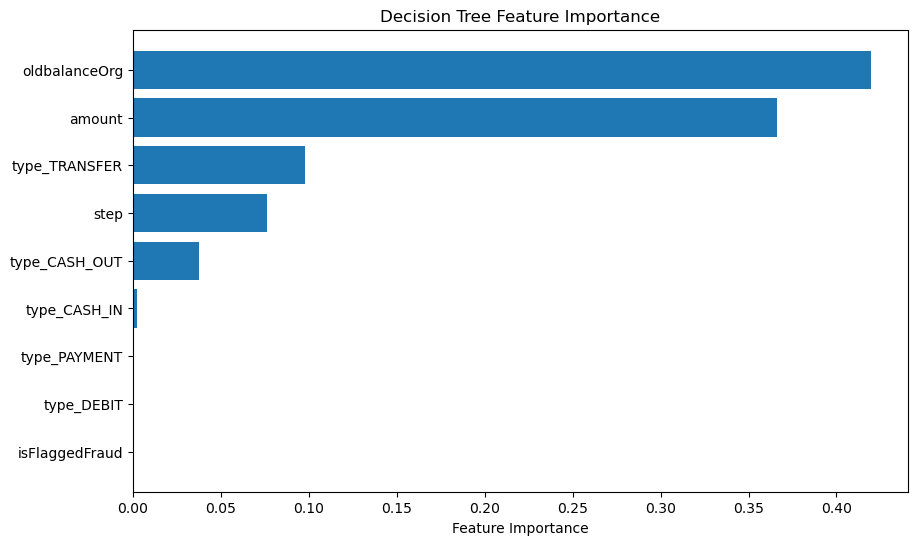

<Figure size 1000x600 with 0 Axes>

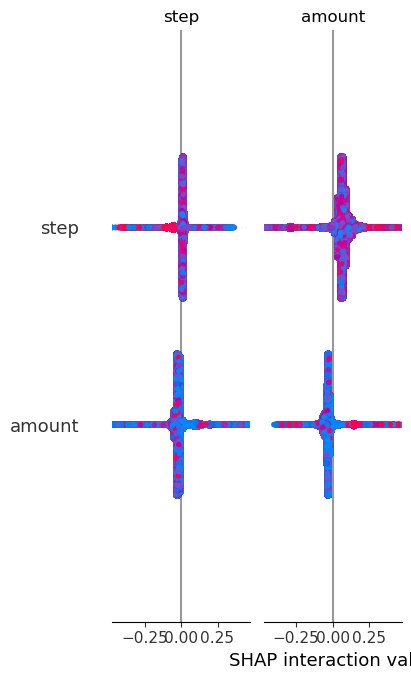

[[[ 0.01730944 -0.01730944]
  [-0.1769986   0.1769986 ]
  [ 0.36533213 -0.36533213]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [-0.11158262  0.11158262]]

 [[ 0.00707494 -0.00707494]
  [ 0.03556477 -0.03556477]
  [ 0.00843458 -0.00843458]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.01122972 -0.01122972]]

 [[-0.05288252  0.05288252]
  [ 0.03083584 -0.03083584]
  [ 0.05278907 -0.05278907]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.0371031  -0.0371031 ]]

 ...

 [[ 0.00662155 -0.00662155]
  [ 0.02683563 -0.02683563]
  [ 0.02754934 -0.02754934]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.01125398 -0.01125398]]

 [[ 0.01070044 -0.01070044]
  [ 0.03416134 -0.03416134]
  [ 0.06190744 -0.06190744]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.00945325 -0.00945325]]

 [[ 0.01610034 -0.01610034]
  [ 0.0876929  -0.0876929 ]
  [ 0.13027361 -0.13027361]
  ...
  [ 0.          0.      

In [44]:
## DECISION TREE 90/10 with hyperparameter tuning and nested-cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl90, y_train_undsampl90, cv=outer_cv)
print("Nested Cross-Validation Accuracy scores:", nested_score)
print("Mean Accuracy:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl90, y_val_undsampl90)
best_dt_params = grid_search.best_estimator_.get_params()
best_dt_classifier = grid_search.best_estimator_

# Now train on training data
best_dt_classifier.fit(X_train_undsampl90, y_train_undsampl90)
y_train90_pred = best_dt_classifier.predict(X_train_undsampl90)
print("Classification Report DT for training Set:")
print(classification_report(y_train_undsampl90, y_train90_pred))

# Evaluate on validation set
y_val90_pred = best_dt_classifier.predict(X_val_undsampl90)
print("Classification Report DT for Validation Set:")
print(classification_report(y_val_undsampl90, y_val90_pred))

# And on the test set
y_pred = best_dt_classifier.predict(X_test)
print("Classification Report DT for Test Set:")
print(classification_report(y_test, y_pred))


# Get feature importance
feature_importance = best_dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP 
import shap
explainer = shap.TreeExplainer(best_dt_classifier)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()

print(shap_values)


Nested Cross-Validation F1 scores: [0.97402157 0.9761531  0.97559602 0.97687931 0.9768401 ]
Mean F1: 0.9758980203242171
Performance on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47304
           1       1.00      1.00      1.00      5256

    accuracy                           1.00     52560
   macro avg       1.00      1.00      1.00     52560
weighted avg       1.00      1.00      1.00     52560

Performance on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11826
           1       0.95      0.97      0.96      1314

    accuracy                           0.99     13140
   macro avg       0.97      0.98      0.98     13140
weighted avg       0.99      0.99      0.99     13140

Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.19      0.9

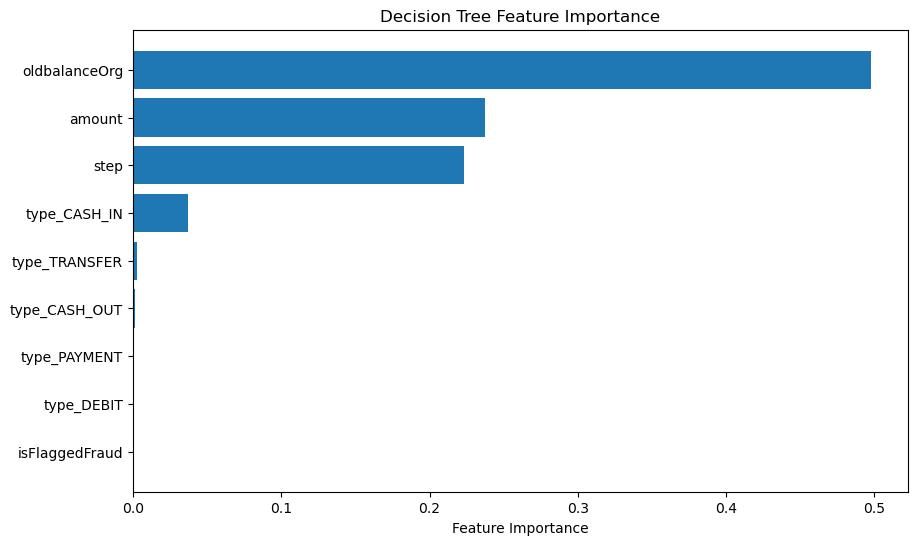

In [47]:
## RANDOM FOREST 90/10 with hyperparameter tuning and nested-cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import shap

# Define hyperparameters grid for tuning
param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

rf_classifier = RandomForestClassifier()

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl90, y_train_undsampl90, cv=outer_cv)
print("Nested Cross-Validation F1 scores:", nested_score)
print("Mean F1:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val_undsampl90, y_val_undsampl90)
best_rf_params = grid_search.best_estimator_.get_params()
best_rf_classifier = grid_search.best_estimator_

# Train on training set
best_rf_classifier = grid_search.fit(X_train_undsampl90, y_train_undsampl90).best_estimator_
print("Performance on Training Set:")
y_train90_pred = best_rf_classifier.predict(X_train_undsampl90)
print(classification_report(y_train_undsampl90, y_train90_pred))

# Evaluate on validation set
print("Performance on Validation Set:")
y_val90_pred = best_rf_classifier.predict(X_val_undsampl90)
print(classification_report(y_val_undsampl90, y_val90_pred))

# Evaluate on test set
print("Performance on Test Set:")
y_pred = best_rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred)) 


# Extract feature importances
feature_importances = best_rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)
print("Feature Importances:", feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP

# Create a TreeExplainer object specifically for the Random Forest model
explainer = shap.TreeExplainer(best_rf_classifier)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot of SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)

print(shap_values)

# Non undersampled 


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Nested Cross-Validation Mean Score: 0.4996737250421702


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Classification Report training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4066820
           1       0.00      0.00      0.00      5256

    accuracy                           1.00   4072076
   macro avg       0.50      0.50      0.50   4072076
weighted avg       1.00      1.00      1.00   4072076

Classification Report Validation Set after Hyperparameter Tuning and CV:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1016706
           1       0.00      0.00      0.00      1314

    accuracy                           1.00   1018020
   macro avg       0.50      0.50      0.50   1018020
weighted avg       1.00      1.00      1.00   1018020

Test Accuracy: 0.998692362580195
Classification Report Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1     

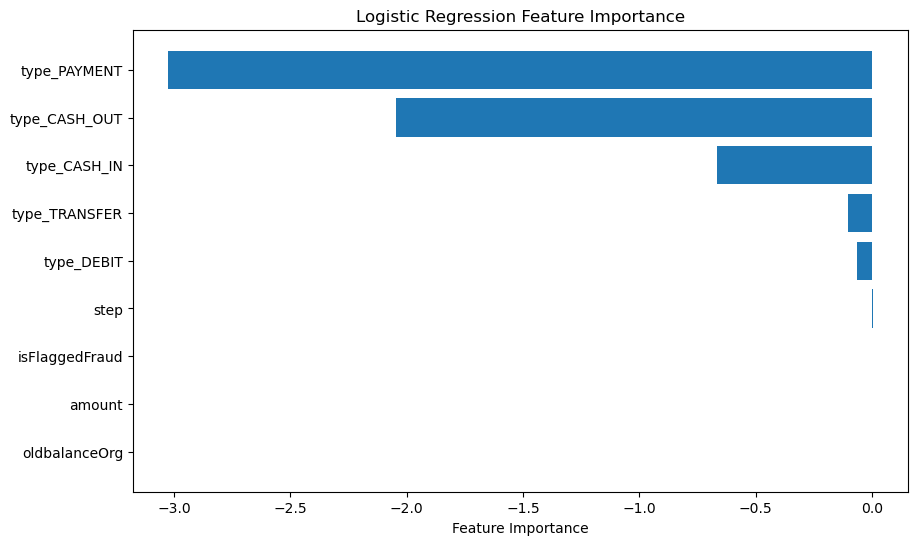

Feature Importance:
step: 0.00271570719856037
amount: 1.1798154171823964e-07
oldbalanceOrg: -1.0998053537136213e-08
isFlaggedFraud: 0.0012936661113015333
type_CASH_IN: -0.6645552127180087
type_CASH_OUT: -2.0440860115073134
type_DEBIT: -0.06632139887705917
type_PAYMENT: -3.0247378617606184
type_TRANSFER: -0.10544826379521968


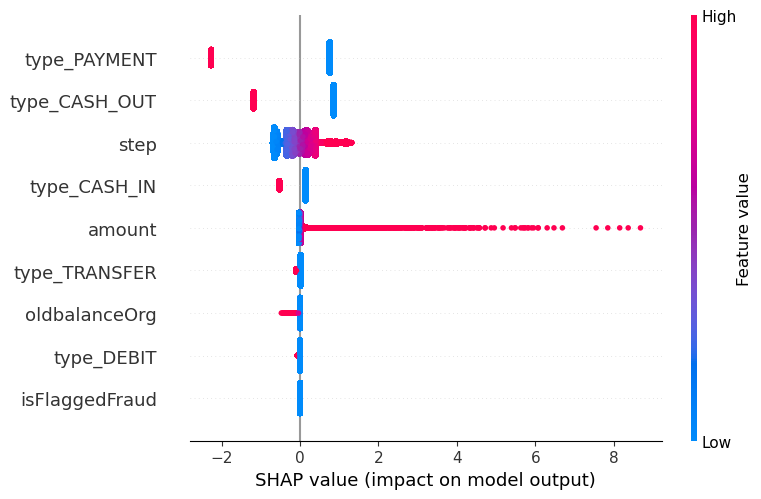

[[ 1.14874414e-01  7.58397374e-02  2.93804291e-03 ... -0.00000000e+00
   7.56184465e-01 -9.27944721e-02]
 [ 3.83729427e-01 -1.77010985e-02 -2.01143265e-02 ... -0.00000000e+00
   7.56184465e-01  1.26537917e-02]
 [ 1.25004002e+00 -2.85349695e-02  2.93697610e-03 ... -0.00000000e+00
  -2.26855340e+00  1.26537917e-02]
 ...
 [ 3.10405333e-01 -1.32255820e-02  2.70636891e-03 ... -0.00000000e+00
   7.56184465e-01  1.26537917e-02]
 [-6.48239308e-01 -1.21967617e-02  2.94044048e-03 ... -0.00000000e+00
   7.56184465e-01  1.26537917e-02]
 [-1.45833477e-01 -6.43609214e-04  2.87743264e-03 ... -0.00000000e+00
   7.56184465e-01 -9.27944721e-02]]


In [45]:
## Logistic Regression with hyperparameter tuning and nested cross validation 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define logistic regression on training set and print class. rep. 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Define hyperparameters grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_val, y_val) 

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv)
print("Nested Cross-Validation Mean Score:", np.mean(nested_score))

# Get the best parameters
grid_search.fit(X_val, y_val) 
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_log_reg = LogisticRegression(**best_params)

# Fitting the best one on the training data and print classification report 
best_log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
print("Classification Report training set:")
print(classification_report(y_train, y_train_pred))

# Evaluate model with best hyperparameters on the Validation set
best_log_reg.fit(X_val, y_val)
y_val_pred = log_reg.predict(X_val)
print("Classification Report Validation Set after Hyperparameter Tuning and CV:")
print(classification_report(y_val, y_val_pred))

# Evaluate model performance on test set
y_pred = log_reg.predict(X_test)
test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Classification Report Test Set:")
print(classification_report(y_test, y_pred))

# Get feature importance and plot 
feature_importance = best_log_reg.coef_[0]
sorted_indices = np.argsort(np.abs(feature_importance))

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

print("Feature Importance:")
for feature, coef in zip(X.columns, best_log_reg.coef_[0]):
    print(f"{feature}: {coef}")


# SHAP 
import shap
explainer = shap.Explainer(best_log_reg, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)

print(shap_values)


Nested Cross-Validation Accuracy scores: [0.86094515 0.85660469 0.85767066 0.85184312 0.85237695]
Mean Accuracy: 0.8558881146617854
Classification Report DT for training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4066820
           1       0.94      0.67      0.78      5256

    accuracy                           1.00   4072076
   macro avg       0.97      0.83      0.89   4072076
weighted avg       1.00      1.00      1.00   4072076

Classification Report DT for Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1016706
           1       0.86      0.58      0.69      1314

    accuracy                           1.00   1018020
   macro avg       0.93      0.79      0.85   1018020
weighted avg       1.00      1.00      1.00   1018020

Classification Report DT for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.0

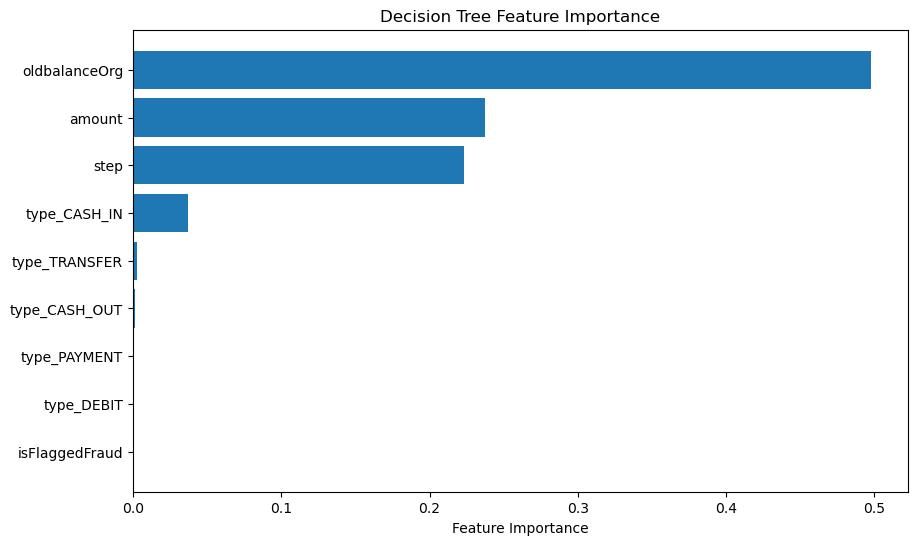

 99%|===================| 2530282/2545048 [01:58<00:00]        

<Figure size 1000x600 with 0 Axes>

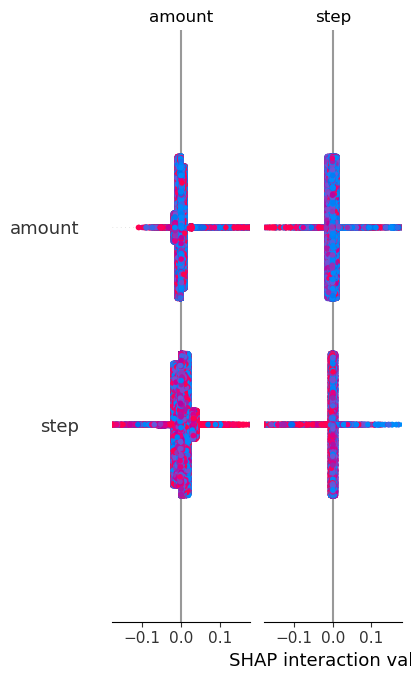

[[[-0.00024483  0.00024483]
  [ 0.00361802 -0.00361802]
  [-0.00138198  0.00138198]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [-0.00187218  0.00187218]]

 [[-0.00081641  0.0008164 ]
  [ 0.01661532 -0.01661532]
  [-0.01657015  0.01657015]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[-0.00255927  0.00255927]
  [ 0.00027962 -0.00027962]
  [ 0.00121913 -0.00121913]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.00104167 -0.00104167]]

 ...

 [[ 0.00041362 -0.00041362]
  [-0.00126317  0.00126317]
  [ 0.00046295 -0.00046295]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.00041667 -0.00041667]]

 [[ 0.000463   -0.000463  ]
  [-0.00125822  0.00125822]
  [ 0.00063893 -0.00063893]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.00040983 -0.00040983]]

 [[ 0.00062429 -0.00062429]
  [ 0.0171934  -0.0171934 ]
  [-0.00827064  0.00827064]
  ...
  [ 0.          0.      

In [46]:
## Decision tree with hyperparameter tuning and nested cross validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv)
print("Nested Cross-Validation Accuracy scores:", nested_score)
print("Mean Accuracy:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val, y_val)
best_dt_params = grid_search.best_estimator_.get_params()
best_dt_classifier = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Now train on training data
best_dt_classifier.fit(X_train, y_train)
y_train_pred = best_dt_classifier.predict(X_train)
print("Classification Report DT for training Set:")
print(classification_report(y_train, y_train_pred))

# Evaluate on validation set
y_val_pred = best_dt_classifier.predict(X_val)
print("Classification Report DT for Validation Set:")
print(classification_report(y_val, y_val_pred))

# And on the test set
y_pred = best_dt_classifier.predict(X_test)
print("Classification Report DT for Test Set:")
print(classification_report(y_test, y_pred))


# Get feature importance
feature_importance = best_dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


print("Feature Importance:")
for feature, coef in zip(X.columns, best_dt_classifier.coef_[0]):
    print(f"{feature}: {coef}")

# SHAP 
import shap
explainer = shap.Explainer(best_dt_classifier, X_train)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()

print(shap_values)

In [ ]:
# RANDOM FOREST with hyperparameter tuning and nested-CV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import shap


# Define hyperparameters grid for tuning
param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

rf_classifier = RandomForestClassifier()

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv)
print("Nested Cross-Validation F1 scores:", nested_score)
print("Mean F1:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val, y_val)
best_rf_params = grid_search.best_estimator_.get_params()
best_rf_classifier = grid_search.best_estimator_

# Train on training set
best_rf_classifier = grid_search.fit(X_train, y_train).best_estimator_
print("Performance on Training Set:")
y_train_pred = best_rf_classifier.predict(X_train)
print(classification_report(y_train, y_train_pred))

# Evaluate on validation set
print("Performance on Validation Set:")
y_val_pred = best_rf_classifier.predict(X_val)
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
print("Performance on Test Set:")
y_pred = best_rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred)) 


# Extract feature importances
feature_importances = best_rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)
print("Feature Importances:", feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


# SHAP

# Create a TreeExplainer object specifically for the Random Forest model
explainer = shap.TreeExplainer(best_rf_classifier, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot of SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)

print(shap_values)

# Best ones! 

Nested Cross-Validation Mean Score: 0.7104546454585764
Best Parameters: {'C': 1, 'penalty': 'l2'}


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report training set:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     47304
           1       0.80      0.34      0.47      5256

    accuracy                           0.93     52560
   macro avg       0.86      0.66      0.72     52560
weighted avg       0.92      0.93      0.91     52560

Classification Report Validation Set after Hyperparameter Tuning and CV:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11826
           1       0.71      0.28      0.40      1314

    accuracy                           0.92     13140
   macro avg       0.82      0.63      0.68     13140
weighted avg       0.90      0.92      0.90     13140

Test Accuracy: 0.9894131662742707
Classification Report Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.03      0.27      0.06      1643

    acc

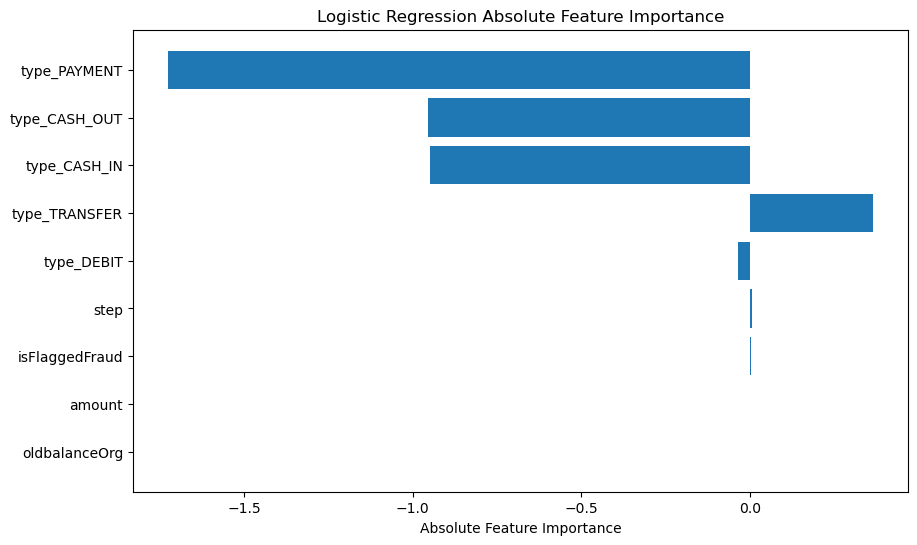

Absolute Feature Importance:
step: 0.004960314568931945
amount: 6.908574161907916e-07
oldbalanceOrg: -3.0820592422486023e-09
isFlaggedFraud: 0.002963895804229194
type_CASH_IN: -0.949257115007913
type_CASH_OUT: -0.9542938103219593
type_DEBIT: -0.03496197626804375
type_PAYMENT: -1.7243977197284288
type_TRANSFER: 0.3631999254553198


In [14]:
## Logistic regression on 90/10 undersampled data + hyperparameter tuning and nested cv
# Changed penalty to only l2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define logistic regression on training set and print class. rep. 
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_undsampl90, y_train_undsampl90)

# Define hyperparameters grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_val_undsampl90, y_val_undsampl90) 

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train_undsampl90, y_train_undsampl90, cv=outer_cv)
print("Nested Cross-Validation Mean Score:", np.mean(nested_score))

# Get the best parameters
grid_search.fit(X_val_undsampl90, y_val_undsampl90) 
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_log_reg = LogisticRegression(**best_params)

# Fitting the best one on the training data and print classification report 
best_log_reg.fit(X_train_undsampl90, y_train_undsampl90)
y_train90_pred = log_reg.predict(X_train_undsampl90)
print("Classification Report training set:")
print(classification_report(y_train_undsampl90, y_train90_pred))

# Evaluate model with best hyperparameters on the Validation set
y_val90_pred = best_log_reg.predict(X_val_undsampl90)
print("Classification Report Validation Set after Hyperparameter Tuning and CV:")
print(classification_report(y_val_undsampl90, y_val90_pred))

# Evaluate model performance on test set
y_pred = best_log_reg.predict(X_test)
test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Classification Report Test Set:")
print(classification_report(y_test, y_pred))

# Get feature importance and plot 
feature_importance_LR = best_log_reg.coef_[0]
abs_feature_importance_LR = np.abs(feature_importance_LR)
sorted_indices_LR = np.argsort(abs_feature_importance_LR)

plt.figure(figsize=(10, 6))
plt.barh(range(len(abs_feature_importance_LR)), feature_importance_LR[sorted_indices_LR], align='center')
plt.yticks(range(len(feature_importance_LR)), X.columns[sorted_indices_LR])
plt.xlabel('Absolute Feature Importance')
plt.title('Logistic Regression Absolute Feature Importance')
plt.show()

print("Absolute Feature Importance:")
for feature, coef in zip(X.columns, best_log_reg.coef_[0]):
    print(f"{feature}: {coef}")





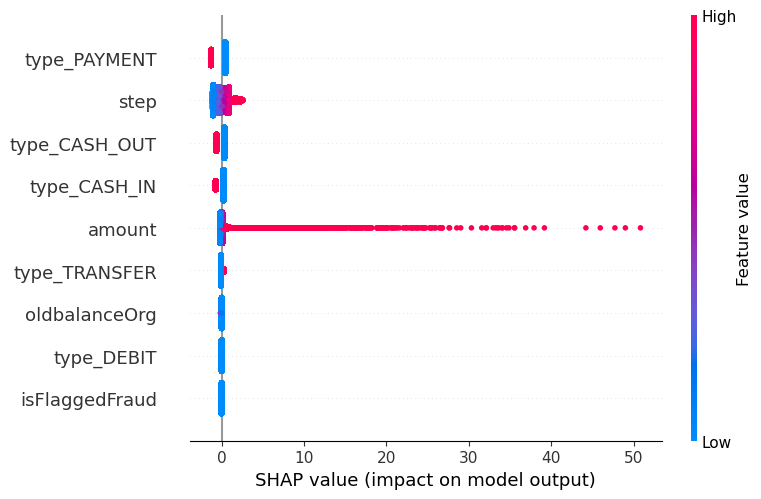

Mean SHAP Values per Feature:
step: 0.09824268504817933
amount: -0.043045048088328125
oldbalanceOrg: 0.0013153859121581846
isFlaggedFraud: 0.0
type_CASH_IN: 0.018759324072875148
type_CASH_OUT: -0.010899997049973093
type_DEBIT: -0.00022762633426225547
type_PAYMENT: -0.1347034252196043
type_TRANSFER: -0.027707376089911074


In [15]:
# SHAP 
feature_names = X_test.columns

import shap
explainer = shap.Explainer(best_log_reg, X_train_undsampl90)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test)



# Calculate mean SHAP values per feature
mean_shap_values = shap_values.mean(axis=0)

# Print mean SHAP values with feature names
print("Mean SHAP Values per Feature:")
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {mean_shap_values[i]}")



Nested Cross-Validation Accuracy scores: [0.86094515 0.85660469 0.85767066 0.85184312 0.85237695]
Mean Accuracy: 0.8558881146617854
Best Parameters: {'C': 1, 'penalty': 'l2'}
Classification Report DT for training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4066820
           1       0.94      0.67      0.78      5256

    accuracy                           1.00   4072076
   macro avg       0.97      0.83      0.89   4072076
weighted avg       1.00      1.00      1.00   4072076

Classification Report DT for Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1016706
           1       0.86      0.58      0.69      1314

    accuracy                           1.00   1018020
   macro avg       0.93      0.79      0.85   1018020
weighted avg       1.00      1.00      1.00   1018020

Classification Report DT for Test Set:
              precision    recall  f1-score 

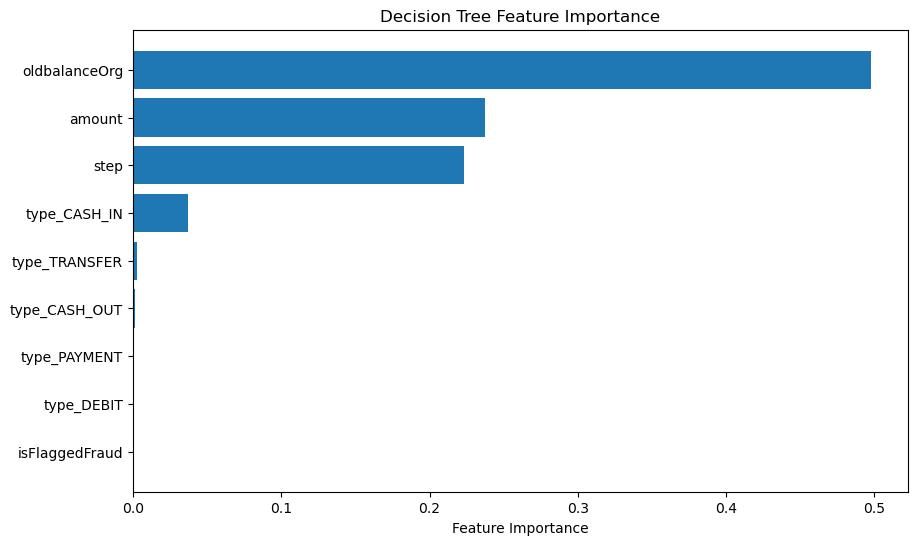

Feature Importance:


AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

In [32]:
## Decision tree with hyperparameter tuning and nested cross validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning and nested CV
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=inner_cv, scoring='f1_macro')
nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv)
print("Nested Cross-Validation Accuracy scores:", nested_score)
print("Mean Accuracy:", nested_score.mean())

# Best hyperparameters found
grid_search.fit(X_val, y_val)
best_dt_params = grid_search.best_estimator_.get_params()
best_dt_classifier = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Now train on training data
best_dt_classifier.fit(X_train, y_train)
y_train_pred = best_dt_classifier.predict(X_train)
print("Classification Report DT for training Set:")
print(classification_report(y_train, y_train_pred))

# Evaluate on validation set
y_val_pred = best_dt_classifier.predict(X_val)
print("Classification Report DT for Validation Set:")
print(classification_report(y_val, y_val_pred))

# And on the test set
y_pred = best_dt_classifier.predict(X_test)
print("Classification Report DT for Test Set:")
print(classification_report(y_test, y_pred))


# Get feature importance
feature_importance = best_dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()



In [33]:
# Print feature importance numbers

# Get feature names
feature_names = X_train.columns 

# Print feature importances
print("Feature Importance DT:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance DT:
step: 0.22330160744208544
amount: 0.23757713613726647
oldbalanceOrg: 0.497822413725939
isFlaggedFraud: 0.0
type_CASH_IN: 0.037094253481304074
type_CASH_OUT: 0.0015071729596555239
type_DEBIT: 0.0
type_PAYMENT: 0.0
type_TRANSFER: 0.002697416253749474


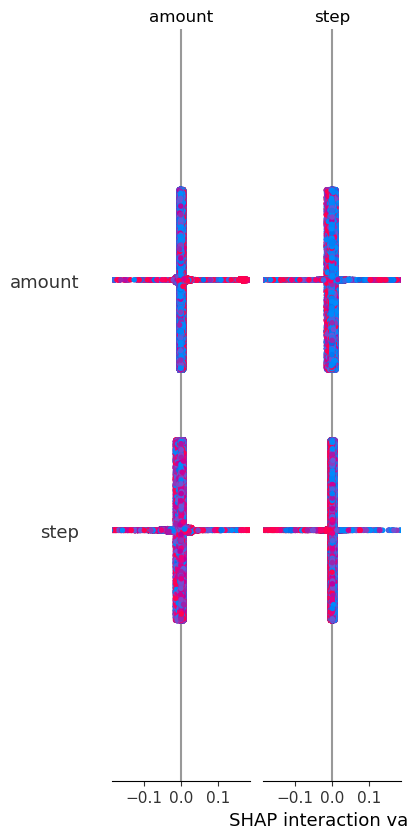

In [54]:
# SHAP 
import shap
explainer = shap.TreeExplainer(best_dt_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)



In [50]:

# Calculate mean SHAP values per feature
mean_shap_values = shap_values.mean(axis=0)

# Print mean SHAP values with feature names
print("Mean SHAP Values per Feature:")
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {mean_shap_values[i]}")

Mean SHAP Values per Feature:
step: [-7.95507118e-05  7.95509311e-05]
amount: [ 0.00044384 -0.00044384]
oldbalanceOrg: [-0.0018847  0.0018847]
isFlaggedFraud: [0. 0.]
type_CASH_IN: [ 1.08098476e-05 -1.08098476e-05]
type_CASH_OUT: [ 8.83643467e-05 -8.83643799e-05]
type_DEBIT: [0. 0.]
type_PAYMENT: [0. 0.]
type_TRANSFER: [ 0.00032386 -0.00032386]


# Pixel Flipping Log Reg

In [9]:
## Make copy of the test set for normal feature importance
# add copy of the features and change them into their own mean 
# First test one. 

# Mean: type_PAYMENT
X_test_C1   =   X_test.copy()
X_test_C1['type_PAYMENT']   =   X_test_C1['type_PAYMENT'].mean()
X_test_C1.head()

,step,amount,oldbalanceOrg,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4051353,300,890577.21,218.00,0,0,0,0,0.338116,1
5746321,399,97734.24,2096258.84,0,1,0,0,0.338116,0
6361797,718,5907.41,315.00,0,0,0,0,0.338116,0
2247309,186,187696.30,11057.00,0,0,1,0,0.338116,0
4692207,331,82646.52,0.00,0,0,1,0,0.338116,0


In [10]:
## Now the rest. 

# Mean: type_PAYMENT + type_CASH_OUT
X_test_C2 = X_test_C1.copy()
X_test_C2['type_CASH_OUT'] =   X_test_C2['type_CASH_OUT'].mean()

# Mean: type_PAYMENT + type_CASH_OUT + type_CASH_IN
X_test_C3 = X_test_C2.copy()
X_test_C3['type_CASH_IN'] =   X_test_C3['type_CASH_IN'].mean()

# Mean: type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER
X_test_C4 = X_test_C3.copy()
X_test_C4['type_TRANSFER'] =   X_test_C4['type_TRANSFER'].mean()

# Mean: type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT
X_test_C5 = X_test_C4.copy()
X_test_C5['type_DEBIT'] =   X_test_C5['type_DEBIT'].mean()

# Mean: type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step
X_test_C6 = X_test_C5.copy()
X_test_C6['step'] =   X_test_C6['step'].mean()

# Mean: type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step + isFlaggedFraud
X_test_C7 = X_test_C6.copy()
X_test_C7['isFlaggedFraud'] =   X_test_C7['isFlaggedFraud'].mean()

# Mean: type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step + isFlaggedFraud + amount
X_test_C8 = X_test_C7.copy()
X_test_C8['amount'] =   X_test_C8['amount'].mean()

# Mean: type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step +  isFlaggedFraud + amount + oldbalanceOrg
X_test_C9 = X_test_C8.copy()
X_test_C9['oldbalanceOrg'] =   X_test_C9['oldbalanceOrg'].mean()

X_test_C9.head()

,step,amount,oldbalanceOrg,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4051353,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
5746321,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
6361797,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
2247309,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
4692207,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713


In [20]:
# Now doing the same for the order of SHAP. 

# Mean: type_PAYMENT
X_test_S1   =   X_test.copy()
X_test_S1['type_PAYMENT']   =   X_test_S1['type_PAYMENT'].mean()

# Mean: type_PAYMENT + step
X_test_S2   =   X_test_S1.copy()
X_test_S2['step']   =   X_test_S2['step'].mean()

# Mean: type_PAYMENT + step + amount
X_test_S3   =   X_test_S2.copy()
X_test_S3['amount']   =   X_test_S3['amount'].mean()

# Mean: type_PAYMENT + step + amount + type_TRANSFER
X_test_S4   =   X_test_S3.copy()
X_test_S4['type_TRANSFER']   =   X_test_S4['type_TRANSFER'].mean()

# Mean: type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN
X_test_S5   =   X_test_S4.copy()
X_test_S5['type_CASH_IN']   =   X_test_S5['type_CASH_IN'].mean()

# Mean: type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT
X_test_S6   =   X_test_S5.copy()
X_test_S6['type_CASH_OUT']   =   X_test_S6['type_CASH_OUT'].mean()

# Mean: type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg
X_test_S7   =   X_test_S6.copy()
X_test_S7['oldbalanceOrg']   =   X_test_S7['oldbalanceOrg'].mean()

# Mean: type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg + type_DEBIT
X_test_S8   =   X_test_S7.copy()
X_test_S8['type_DEBIT']   =   X_test_S8['type_DEBIT'].mean()



KeyError: 'isflaggedFraud'

In [21]:
# Mean: type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg + type_DEBIT + isflaggedFraud
X_test_S9   =   X_test_S8.copy()
X_test_S9['isFlaggedFraud']   =   X_test_S9['isFlaggedFraud'].mean()

X_test_S9.head()

,step,amount,oldbalanceOrg,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4051353,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
5746321,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
6361797,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
2247309,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
4692207,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713


In [57]:
## Now running the model on the test set in the order of the normal feature importance. 
# Order: type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step +  isFlaggedFraud + amount + oldbalanceOrg

# Only type_PAYMENT
y_pred1 = best_log_reg.predict(X_test_C1)
test_accuracy1 = best_log_reg.score(X_test_C1, y_test)
print("Test Accuracy:", test_accuracy1)
print("Classification Report Test Set, mean type_PAYMENT:")
print(classification_report(y_test, y_pred1))

# type_PAYMENT + type_CASH_OUT
y_pred2 = best_log_reg.predict(X_test_C2)
test_accuracy2 = best_log_reg.score(X_test_C2, y_test)
print("Test Accuracy:", test_accuracy2)
print("Classification Report Test Set, mean type_PAYMENT + type_CASH_OUT:")
print(classification_report(y_test, y_pred2))

# type_PAYMENT + type_CASH_OUT + type_CASH_IN
y_pred3 = best_log_reg.predict(X_test_C3)
test_accuracy3 = best_log_reg.score(X_test_C3, y_test)
print("Test Accuracy:", test_accuracy3)
print("Classification Report Test Set, 3 features replaced with mean:")
print(classification_report(y_test, y_pred3))

# type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER
y_pred4 = best_log_reg.predict(X_test_C4)
test_accuracy4 = best_log_reg.score(X_test_C4, y_test)
print("Test Accuracy:", test_accuracy4)
print("Classification Report Test Set, 4 features replaced with mean:")
print(classification_report(y_test, y_pred4))

# type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT
y_pred5 = best_log_reg.predict(X_test_C5)
test_accuracy5 = best_log_reg.score(X_test_C5, y_test)
print("Test Accuracy:", test_accuracy5)
print("Classification Report Test Set, 5 features replaced with mean:")
print(classification_report(y_test, y_pred5))

# type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step
y_pred6 = best_log_reg.predict(X_test_C6)
test_accuracy6 = best_log_reg.score(X_test_C6, y_test)
print("Test Accuracy:", test_accuracy6)
print("Classification Report Test Set, 6 features replaced with mean:")
print(classification_report(y_test, y_pred6))

# type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step + isFlaggedFraud
y_pred7 = best_log_reg.predict(X_test_C7)
test_accuracy7 = best_log_reg.score(X_test_C7, y_test)
print("Test Accuracy:", test_accuracy7)
print("Classification Report Test Set, 7 features replaced with mean:")
print(classification_report(y_test, y_pred7))

# type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step + isFlaggedFraud + amount
y_pred8 = best_log_reg.predict(X_test_C8)
test_accuracy8 = best_log_reg.score(X_test_C8, y_test)
print("Test Accuracy:", test_accuracy8)
print("Classification Report Test Set, 8 features replaced with mean:")
print(classification_report(y_test, y_pred8))

# type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step + isFlaggedFraud + amount + oldbalanceOrg
y_pred9 = best_log_reg.predict(X_test_C9)
test_accuracy9 = best_log_reg.score(X_test_C9, y_test)
print("Test Accuracy:", test_accuracy9)
print("Classification Report Test Set, 9 features replaced with mean:")
print(classification_report(y_test, y_pred9))

Test Accuracy: 0.993928601739535
Classification Report Test Set, mean type_PAYMENT:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.04      0.18      0.07      1643

    accuracy                           0.99   1272524
   macro avg       0.52      0.59      0.53   1272524
weighted avg       1.00      0.99      1.00   1272524

Test Accuracy: 0.9953910495990645
Classification Report Test Set, mean type_PAYMENT + type_CASH_OUT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.05      0.16      0.08      1643

    accuracy                           1.00   1272524
   macro avg       0.53      0.58      0.54   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9959521392130914
Classification Report Test Set, 3 features replaced with mean:
              precision    recall  f1-score   support

         

c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 9 features replaced with mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
## Now running the model on the test set in the order of SHAP
# Order: type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg + type_DEBIT + isflaggedFraud

# Only type_PAYMENT
y_pred1 = best_log_reg.predict(X_test_S1)
test_accuracy1 = best_log_reg.score(X_test_S1, y_test)
print("Test Accuracy:", test_accuracy1)
print("Classification Report Test Set, 1 feature replaced by mean:")
print(classification_report(y_test, y_pred1))

# type_PAYMENT + step
y_pred2 = best_log_reg.predict(X_test_S2)
test_accuracy2 = best_log_reg.score(X_test_S2, y_test)
print("Test Accuracy:", test_accuracy2)
print("Classification Report Test Set, 2 features replaced by mean:")
print(classification_report(y_test, y_pred2))

# type_PAYMENT + step + amount
y_pred3 = best_log_reg.predict(X_test_S3)
test_accuracy3 = best_log_reg.score(X_test_S3, y_test)
print("Test Accuracy:", test_accuracy3)
print("Classification Report Test Set, 3 features replaced by mean:")
print(classification_report(y_test, y_pred3))

# type_PAYMENT + step + amount + type_TRANSFER
y_pred4 = best_log_reg.predict(X_test_S4)
test_accuracy4 = best_log_reg.score(X_test_S4, y_test)
print("Test Accuracy:", test_accuracy4)
print("Classification Report Test Set, 4 features replaced by mean:")
print(classification_report(y_test, y_pred4))

# type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN
y_pred5 = best_log_reg.predict(X_test_S5)
test_accuracy5 = best_log_reg.score(X_test_S5, y_test)
print("Test Accuracy:", test_accuracy5)
print("Classification Report Test Set, 5 features replaced by mean:")
print(classification_report(y_test, y_pred5))

# type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT
y_pred6 = best_log_reg.predict(X_test_S6)
test_accuracy6 = best_log_reg.score(X_test_S6, y_test)
print("Test Accuracy:", test_accuracy6)
print("Classification Report Test Set, 6 features replaced by mean:")
print(classification_report(y_test, y_pred6))

# type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg
y_pred7 = best_log_reg.predict(X_test_S7)
test_accuracy7 = best_log_reg.score(X_test_S7, y_test)
print("Test Accuracy:", test_accuracy7)
print("Classification Report Test Set, 7 features replaced by mean:")
print(classification_report(y_test, y_pred7))

# type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg + type_DEBIT
y_pred8 = best_log_reg.predict(X_test_S8)
test_accuracy8 = best_log_reg.score(X_test_S8, y_test)
print("Test Accuracy:", test_accuracy8)
print("Classification Report Test Set, 8 features replaced by mean:")
print(classification_report(y_test, y_pred8))

# type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg + type_DEBIT + isFlaggedFraud
y_pred9 = best_log_reg.predict(X_test_S9)
test_accuracy9 = best_log_reg.score(X_test_S9, y_test)
print("Test Accuracy:", test_accuracy9)
print("Classification Report Test Set, 9 features replaced by mean:")
print(classification_report(y_test, y_pred9))

Test Accuracy: 0.993928601739535
Classification Report Test Set, 1 feature replaced by mean:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.04      0.18      0.07      1643

    accuracy                           0.99   1272524
   macro avg       0.52      0.59      0.53   1272524
weighted avg       1.00      0.99      1.00   1272524

Test Accuracy: 0.9960063621589849
Classification Report Test Set, 2 features replaced by mean:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.05      0.11      0.06      1643

    accuracy                           1.00   1272524
   macro avg       0.52      0.55      0.53   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 3 features replaced by mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 4 features replaced by mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 5 features replaced by mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 6 features replaced by mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 7 features replaced by mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 8 features replaced by mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 9 features replaced by mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


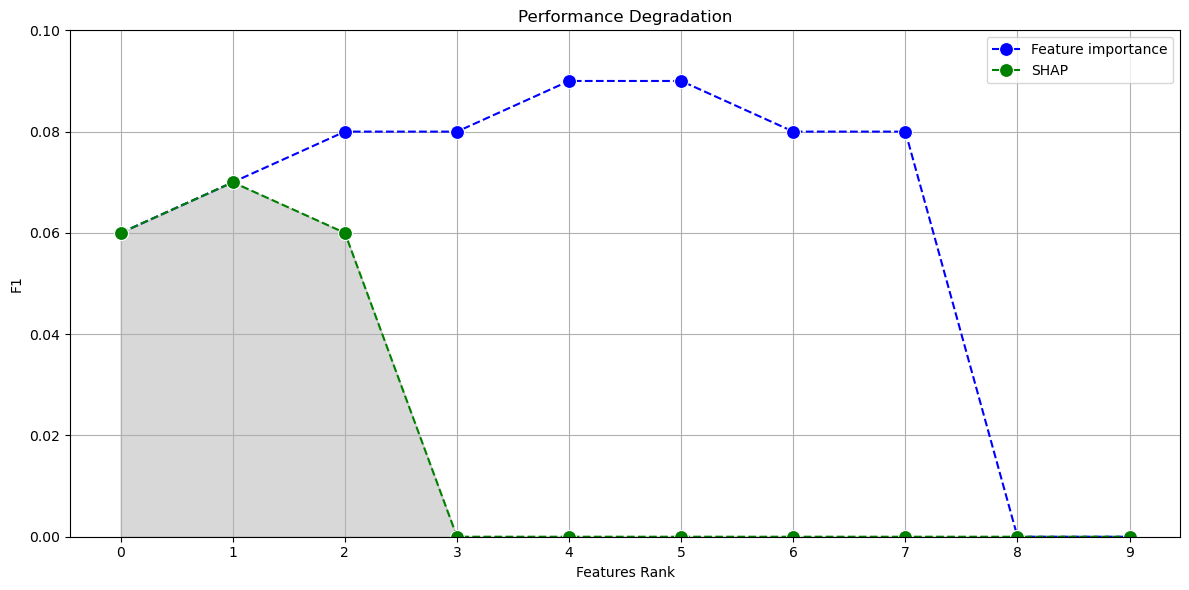

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Making da DF for performance degradation 
# Order FI: type_PAYMENT + type_CASH_OUT + type_CASH_IN + type_TRANSFER + type_DEBIT + step +  isFlaggedFraud + amount + oldbalanceOrg
# Order SHAP : type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg + type_DEBIT + isflaggedFraud
log_reg_performance = {
    "Features replaced with mean": ["0", "1", "2", "3", "4", "5","6", "7", "8", "9"],
    "Feature importance": [0.06, 0.07, 0.08, 0.08, 0.09, 0.09, 0.08, 0.08, 0.00, 0.00],
    "SHAP": [0.06, 0.07, 0.06, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
}

df_LR = pd.DataFrame(log_reg_performance)
plt.figure(figsize=(12, 6))

# Plotting lines
sns.lineplot(x=df_LR.index, y='Feature importance', data=df_LR, marker='o', markersize=10, label='Feature importance', color='blue', linestyle='--')
sns.lineplot(x=df_LR.index, y='SHAP', data=df_LR, marker='o', markersize=10, label='SHAP', color='green', linestyle='--')

# Fill area under th3 curve
plt.fill_between(df_LR.index, df_LR['SHAP'], alpha=0.3, color='gray')

# Plot the figure
plt.title('Performance Degradation')
plt.ylabel('F1')
plt.ylim(0, 0.1) 
plt.xlabel('Features Rank')
plt.xticks(range(len(df_LR['Features replaced with mean'])), labels=range(len(df_LR['Features replaced with mean'])))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Pixel Flipping Decision Tree

In [56]:
## Make copy of the test set for normal feature importance 
# Order: oldbalanceOrg, amount, step, type_CASH_IN, type_TRANSFER, type_CASH_OUT, type_PAYMENT, type_DEBIT, isFlaggedFraud

# Mean: oldbalanceOrg
X_test_dt1   =   X_test.copy()
X_test_dt1['oldbalanceOrg']   =   X_test_dt1['oldbalanceOrg'].mean()

# Mean: oldbalanceOrg + amount
X_test_dt2   =   X_test_dt1.copy()
X_test_dt2['amount']   =   X_test_dt2['amount'].mean()

# Mean: oldbalanceOrg + amount + step
X_test_dt3   =   X_test_dt2.copy()
X_test_dt3['step']   =   X_test_dt3['step'].mean()

# Mean: oldbalanceOrg + amount + step + type_CASH_IN
X_test_dt4   =   X_test_dt3.copy()
X_test_dt4['type_CASH_IN']   =   X_test_dt4['type_CASH_IN'].mean()

# Mean: oldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER
X_test_dt5   =   X_test_dt4.copy()
X_test_dt5['type_TRANSFER']   =   X_test_dt5['type_TRANSFER'].mean()

# Mean: oldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT
X_test_dt6   =   X_test_dt5.copy()
X_test_dt6['type_CASH_OUT']   =   X_test_dt6['type_CASH_OUT'].mean()

# Mean: oldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT + type_PAYMENT
X_test_dt7   =   X_test_dt6.copy()
X_test_dt7['type_PAYMENT']   =   X_test_dt7['type_PAYMENT'].mean()

# Mean: oldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT + type_PAYMENT + type_DEBIT
X_test_dt8   =   X_test_dt7.copy()
X_test_dt8['type_DEBIT']   =   X_test_dt8['type_DEBIT'].mean()

# Mean: oldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT + type_PAYMENT + type_DEBIT + isFlaggedFraud
X_test_dt9   =   X_test_dt8.copy()
X_test_dt9['isFlaggedFraud']   =   X_test_dt9['isFlaggedFraud'].mean()

X_test_dt9.head()

,step,amount,oldbalanceOrg,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4051353,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
5746321,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
6361797,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
2247309,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
4692207,243.535737,179671.221049,834435.981916,0.0,0.220238,0.351422,0.006511,0.338116,0.083713


In [59]:
## Now running the model on the test set in the order of the normal feature importance. 
# Order: oldbalanceOrg, amount, step, type_CASH_IN, type_TRANSFER, type_CASH_OUT, type_PAYMENT, type_DEBIT, isFlaggedFraud

# Only oldbalanceOrg
y_pred_dt1 = best_dt_classifier.predict(X_test_dt1)
test_accuracy1 = best_dt_classifier.score(X_test_dt1, y_test)
print("Test Accuracy:", test_accuracy1)
print("Classification Report Test Set, 1 feature changed to mean:")
print(classification_report(y_test, y_pred_dt1))

# OldbalanceOrg + amount
y_pred_dt2 = best_dt_classifier.predict(X_test_dt2)
test_accuracy2 = best_dt_classifier.score(X_test_dt2, y_test)
print("Test Accuracy:", test_accuracy2)
print("Classification Report Test Set, 2 features changed to mean:")
print(classification_report(y_test, y_pred_dt2))

# OldbalanceOrg + amount + step
y_pred_dt3 = best_dt_classifier.predict(X_test_dt3)
test_accuracy3 = best_dt_classifier.score(X_test_dt3, y_test)
print("Test Accuracy:", test_accuracy3)
print("Classification Report Test Set, 3 features changed to mean:")
print(classification_report(y_test, y_pred_dt3))

# OldbalanceOrg + amount + step + type_CASH_IN
y_pred_dt4 = best_dt_classifier.predict(X_test_dt4)
test_accuracy4 = best_dt_classifier.score(X_test_dt4, y_test)
print("Test Accuracy:", test_accuracy4)
print("Classification Report Test Set, 4 features changed to mean:")
print(classification_report(y_test, y_pred_dt4))

# OldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER
y_pred_dt5 = best_dt_classifier.predict(X_test_dt5)
test_accuracy5 = best_dt_classifier.score(X_test_dt5, y_test)
print("Test Accuracy:", test_accuracy5)
print("Classification Report Test Set, 5 features changed to mean:")
print(classification_report(y_test, y_pred_dt5))

# OldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT
y_pred_dt6 = best_dt_classifier.predict(X_test_dt6)
test_accuracy6 = best_dt_classifier.score(X_test_dt6, y_test)
print("Test Accuracy:", test_accuracy6)
print("Classification Report Test Set, 6 features changed to mean:")
print(classification_report(y_test, y_pred_dt6))

# OldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT + type_PAYMENT
y_pred_dt7 = best_dt_classifier.predict(X_test_dt7)
test_accuracy7 = best_dt_classifier.score(X_test_dt7, y_test)
print("Test Accuracy:", test_accuracy7)
print("Classification Report Test Set, 7 features changed to mean:")
print(classification_report(y_test, y_pred_dt7))

# OldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT + type_PAYMENT + type_DEBIT
y_pred_dt8 = best_dt_classifier.predict(X_test_dt8)
test_accuracy8 = best_dt_classifier.score(X_test_dt8, y_test)
print("Test Accuracy:", test_accuracy8)
print("Classification Report Test Set, 8 features changed to mean:")
print(classification_report(y_test, y_pred_dt8))

# OldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT + type_PAYMENT + type_DEBIT + isFlaggedFraud
y_pred_dt9 = best_dt_classifier.predict(X_test_dt9)
test_accuracy9 = best_dt_classifier.score(X_test_dt9, y_test)
print("Test Accuracy:", test_accuracy9)
print("Classification Report Test Set, 9 features changed to mean:")
print(classification_report(y_test, y_pred_dt9))

Test Accuracy: 0.9949745545074199
Classification Report Test Set, 1 feature changed to mean:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.03      0.08      0.04      1643

    accuracy                           0.99   1272524
   macro avg       0.51      0.54      0.52   1272524
weighted avg       1.00      0.99      1.00   1272524

Test Accuracy: 0.9987442280067016
Classification Report Test Set, 2 features changed to mean:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      0.03      0.05      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.51      0.53   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 3 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 4 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 5 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 6 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 7 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 8 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 9 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
## Make copy of the test set for SHAP feature importance 
# Order: oldbalanceOrg, amount, type_TRANSFER, type_CASH_OUT, step, type_CASH_IN, isFlaggedFraud, type_DEBIT, type_PAYMENT

# Mean: oldbalanceOrg
X_test_st1   =   X_test.copy()
X_test_st1['oldbalanceOrg']   =   X_test_dt1['oldbalanceOrg'].mean()

# Mean: oldbalanceOrg + amount
X_test_st2   =   X_test_st1.copy()
X_test_st2['amount']   =   X_test_dt2['amount'].mean()

# Mean: oldbalanceOrg + amount + type_TRANSFER
X_test_st3   =   X_test_st2.copy()
X_test_st3['type_TRANSFER']   =   X_test_dt3['type_TRANSFER'].mean()

# Mean: oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT
X_test_st4   =   X_test_st3.copy()
X_test_st4['type_CASH_OUT']   =   X_test_dt4['type_CASH_OUT'].mean()

# Mean: oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step
X_test_st5   =   X_test_st4.copy()
X_test_st5['step']   =   X_test_dt5['step'].mean()

# Mean: oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN
X_test_st6   =   X_test_st5.copy()
X_test_st6['type_CASH_IN']   =   X_test_dt6['type_CASH_IN'].mean()

# Mean: oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN + isFlaggedFraud
X_test_st7   =   X_test_st6.copy()
X_test_st7['isFlaggedFraud']   =   X_test_dt7['isFlaggedFraud'].mean()

# Mean: oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN + isFlaggedFraud + type_DEBIT
X_test_st8   =   X_test_st7.copy()
X_test_st8['type_DEBIT']   =   X_test_dt8['type_DEBIT'].mean()

# Mean: oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN + isFlaggedFraud + type_DEBIT + type_PAYMENT
X_test_st9   =   X_test_st8.copy()
X_test_st9['type_PAYMENT']   =   X_test_dt9['type_PAYMENT'].mean()

X_test_st9.head()

,step,amount,oldbalanceOrg,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4051353,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
5746321,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
6361797,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
2247309,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
4692207,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
...,...,...,...,...,...,...,...,...,...
4586779,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
5202249,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
5274477,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713
479091,243.535737,179671.221049,834435.981917,0.0,0.220238,0.351422,0.006511,0.338116,0.083713


In [61]:
## And running the model on the new test sets
# Order:  oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN + isFlaggedFraud + type_DEBIT + type_PAYMENT

# Only oldbalanceOrg
y_pred_st1 = best_dt_classifier.predict(X_test_st1)
test_accuracy1 = best_dt_classifier.score(X_test_st1, y_test)
print("Test Accuracy:", test_accuracy1)
print("Classification Report Test Set, 1 feature changed to mean:")
print(classification_report(y_test, y_pred_st1))

# oldbalanceOrg + amount
y_pred_st2 = best_dt_classifier.predict(X_test_st2)
test_accuracy2 = best_dt_classifier.score(X_test_st2, y_test)
print("Test Accuracy:", test_accuracy2)
print("Classification Report Test Set, 2 features changed to mean:")
print(classification_report(y_test, y_pred_st2))

# oldbalanceOrg + amount + type_TRANSFER
y_pred_st3 = best_dt_classifier.predict(X_test_st3)
test_accuracy3 = best_dt_classifier.score(X_test_st3, y_test)
print("Test Accuracy:", test_accuracy3)
print("Classification Report Test Set, 3 features changed to mean:")
print(classification_report(y_test, y_pred_st3))

# oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT
y_pred_st4 = best_dt_classifier.predict(X_test_st4)
test_accuracy4 = best_dt_classifier.score(X_test_st4, y_test)
print("Test Accuracy:", test_accuracy4)
print("Classification Report Test Set, 4 features changed to mean:")
print(classification_report(y_test, y_pred_st4))

# oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step
y_pred_st5 = best_dt_classifier.predict(X_test_st5)
test_accuracy5 = best_dt_classifier.score(X_test_st5, y_test)
print("Test Accuracy:", test_accuracy5)
print("Classification Report Test Set, 5 features changed to mean:")
print(classification_report(y_test, y_pred_st5))

# oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN 
y_pred_st6 = best_dt_classifier.predict(X_test_st6)
test_accuracy6 = best_dt_classifier.score(X_test_st6, y_test)
print("Test Accuracy:", test_accuracy6)
print("Classification Report Test Set, 6 features changed to mean:")
print(classification_report(y_test, y_pred_st6))

# oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN + isFlaggedFraud
y_pred_st7 = best_dt_classifier.predict(X_test_st7)
test_accuracy7 = best_dt_classifier.score(X_test_st7, y_test)
print("Test Accuracy:", test_accuracy7)
print("Classification Report Test Set, 7 features changed to mean:")
print(classification_report(y_test, y_pred_st7))

# oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN + isFlaggedFraud + type_DEBIT
y_pred_st8 = best_dt_classifier.predict(X_test_st8)
test_accuracy8 = best_dt_classifier.score(X_test_st8, y_test)
print("Test Accuracy:", test_accuracy8)
print("Classification Report Test Set, 8 features changed to mean:")
print(classification_report(y_test, y_pred_st8))

# oldbalanceOrg + amount + type_TRANSFER + type_CASH_OUT + step + type_CASH_IN + isFlaggedFraud + type_DEBIT + type_PAYMENT
y_pred_st9 = best_dt_classifier.predict(X_test_st9)
test_accuracy9 = best_dt_classifier.score(X_test_st9, y_test)
print("Test Accuracy:", test_accuracy9)
print("Classification Report Test Set, 9 features changed to mean:")
print(classification_report(y_test, y_pred_st9))

Test Accuracy: 0.9949745545074199
Classification Report Test Set, 1 feature changed to mean:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.03      0.08      0.04      1643

    accuracy                           0.99   1272524
   macro avg       0.51      0.54      0.52   1272524
weighted avg       1.00      0.99      1.00   1272524

Test Accuracy: 0.9987442280067016
Classification Report Test Set, 2 features changed to mean:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      0.03      0.05      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.51      0.53   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987442280067016
Classification Report Test Set, 3 features changed to mean:
              precision    recall  f1-score   support

          

c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 6 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 7 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 8 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Test Accuracy: 0.9987088652159016
Classification Report Test Set, 9 features changed to mean:


c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



c:\Users\hanna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


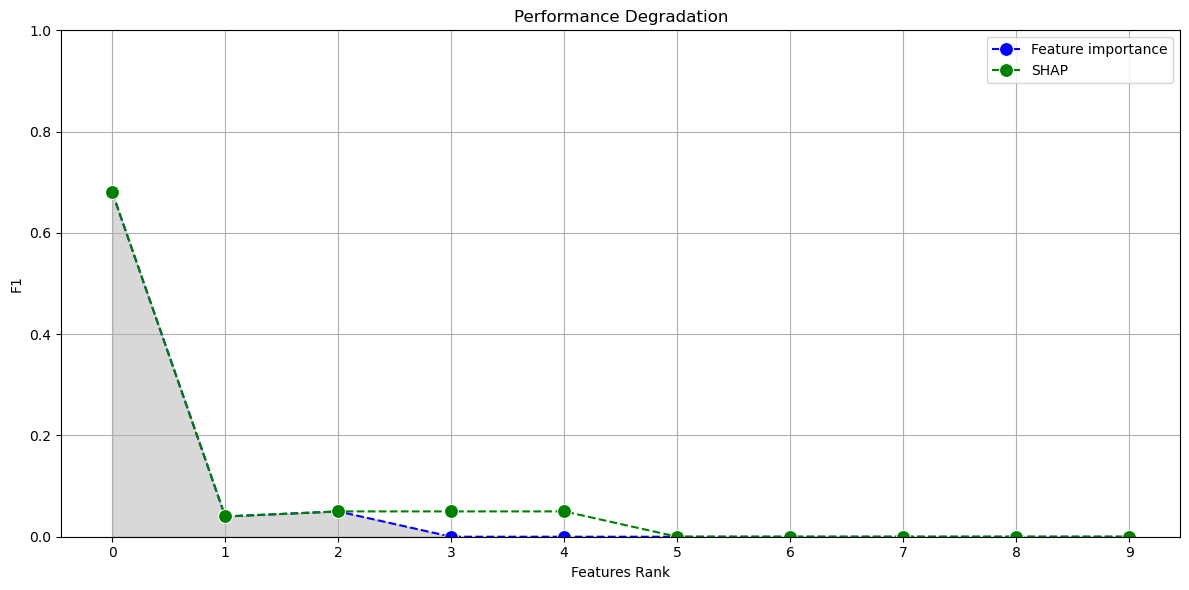

In [63]:
## And plottigng!

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Order Feature importance: OldbalanceOrg + amount + step + type_CASH_IN + type_TRANSFER + type_CASH_OUT + type_PAYMENT + type_DEBIT + isFlaggedFraud
# Order SHAP : type_PAYMENT + step + amount + type_TRANSFER + type_CASH_IN + type_CASH_OUT + oldbalanceOrg + type_DEBIT + isflaggedFraud
DT_performance = {
    "Features replaced with mean": ["0", "1", "2", "3", "4", "5","6", "7", "8", "9"],
    "Feature importance": [0.68, 0.04, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    "SHAP": [0.68, 0.04, 0.05, 0.05, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00]
}

df_DT = pd.DataFrame(DT_performance)
plt.figure(figsize=(12, 6))

# Plotting lines
sns.lineplot(x=df_DT.index, y='Feature importance', data=df_DT, marker='o', markersize=10, label='Feature importance', color='blue', linestyle='--')
sns.lineplot(x=df_DT.index, y='SHAP', data=df_DT, marker='o', markersize=10, label='SHAP', color='green', linestyle='--')

# Fill area under thr curve
plt.fill_between(df_DT.index, df_DT['Feature importance'], alpha=0.3, color='gray')

# Plot the figure
plt.title('Performance Degradation')
plt.ylabel('F1')
plt.ylim(0, 1) 
plt.xlabel('Features Rank')
plt.xticks(range(len(df_DT['Features replaced with mean'])), labels=range(len(df_DT['Features replaced with mean'])))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()